

###### Goal is to understand the demand for shared bikes among the people after this ongoing quarantine situation ends.

The company wants to know:
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

Target variable in this dataset is the 'cnt' variable, which indicates the total number of bike rentals, including both casual and registered.

##### Importing necessary libraries

In [210]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Understanding the given dataset

In [211]:
# read the csv to a dataframe
bikesharing = pd.read_csv('day.csv')

In [212]:
# check the kind of data in dataset
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [213]:
# check the shape of the dataset
bikesharing.shape

(730, 16)

In [214]:
# info on the given dataset
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [215]:
# There are no NULL values in the given dataset. All the 730 row are filled with some data. NULL value handling is not required.
bikesharing.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [216]:
# instant is a record index and might not be helpful in this analysis. This can be dropped
bikesharing.drop('instant', axis=1, inplace=True)

In [217]:
# number of columns is now reduced from 16 to 15
bikesharing.shape

(730, 15)

In [218]:
# check the level of each variable using the value_counts
bikesharing.season.value_counts()

# from the data dictonary we know that each number relates to a categorical value. 
# season (1:spring, 2:summer, 3:fall, 4:winter)

3    188
2    184
1    180
4    178
Name: season, dtype: int64

### Visualising the data

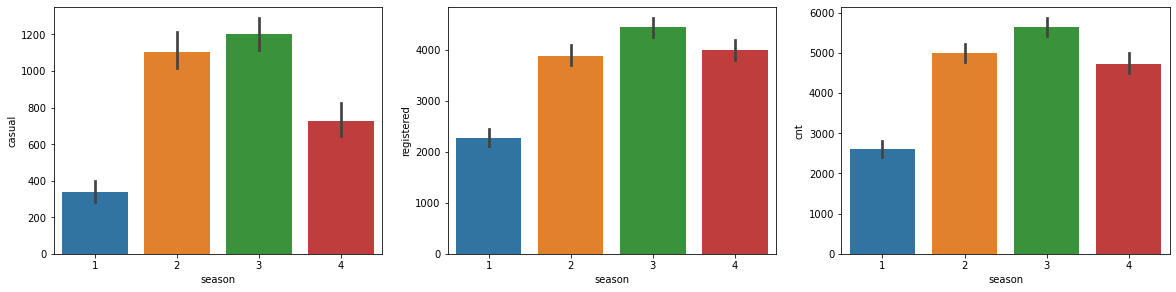

In [219]:
# plot showing the usage of bikes across four seasons
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot(bikesharing.season, bikesharing.casual)
plt.subplot(2,3,2)
sns.barplot(bikesharing.season, bikesharing.registered)
plt.subplot(2,3,3)
sns.barplot(bikesharing.season, bikesharing.cnt)
plt.show()

# from the data dictonary we know that each number relates to a categorical value. 
# season (1:spring, 2:summer, 3:fall, 4:winter)
# seems like the bike usage (both casual and registered) is more during the fall, summer and followed by winter.
# bike usage is less in spring in all the cases.

In [220]:
# check the values in the attribute yr in the given dataset
bikesharing.yr.value_counts()

# as per the data dictonary the value 0 represents the data from the year 2018 and 1 for 2019
# categrical values can be updated with the actual categorical names but for the sake of analysis as of now these can be left as it is.

1    365
0    365
Name: yr, dtype: int64

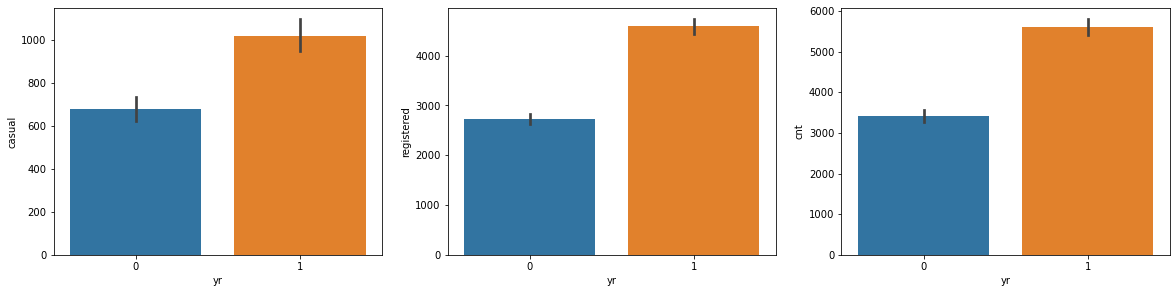

In [221]:
# a significant increase can be seen from the year 2018 to 2019 in the bike sharing
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.barplot(bikesharing.yr, bikesharing.casual)
plt.subplot(2,3,2)
sns.barplot(bikesharing.yr, bikesharing.registered)
plt.subplot(2,3,3)
sns.barplot(bikesharing.yr, bikesharing.cnt)
plt.show()

Seems like the bike sharing has been gaining popularity gradually year on year. Signicifant increase can be seen in both casual and registered customers.

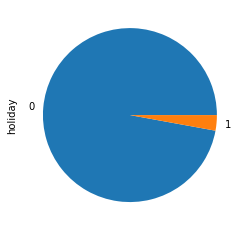

In [222]:
# influence of holiday on the bike usage
bikesharing.holiday.value_counts(normalize=True).plot.pie()
plt.show()

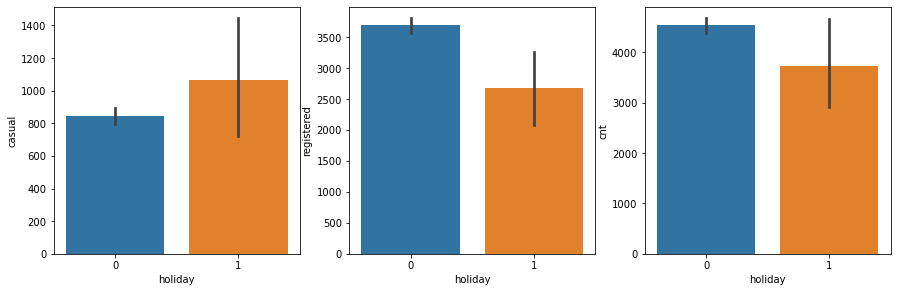

In [223]:
# influence of holiday on the bike usage
# plot showing the usage of bikes on a non-holiday and holiday
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(bikesharing.holiday, bikesharing.casual)
plt.subplot(2,3,2)
sns.barplot(bikesharing.holiday, bikesharing.registered)
plt.subplot(2,3,3)
sns.barplot(bikesharing.holiday, bikesharing.cnt)
plt.show()

In [224]:
# effect of weather on the bike hiring
# as per the data dictonary below are the explanation for the numerical values. 
# These values can be replaced with the categories but here the category length is longer and may cause hassle in plotting
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

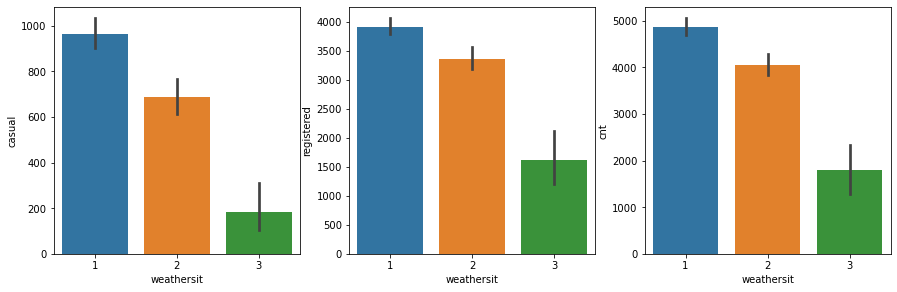

In [225]:
# plot weather variable with cnt, casual and registered
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(bikesharing.weathersit, bikesharing.casual)
plt.subplot(2,3,2)
sns.barplot(bikesharing.weathersit, bikesharing.registered)
plt.subplot(2,3,3)
sns.barplot(bikesharing.weathersit, bikesharing.cnt)
plt.show()

In [226]:
# impact on bike hiring across days in a week
bikesharing.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

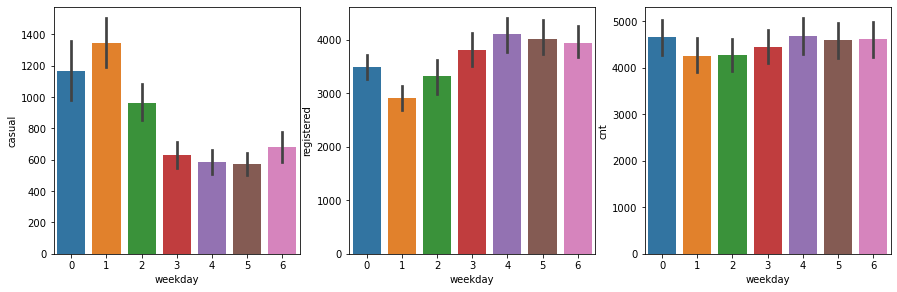

In [227]:
# plot week day with cnt, casual and registered
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(bikesharing.weekday, bikesharing.casual)
plt.subplot(2,3,2)
sns.barplot(bikesharing.weekday, bikesharing.registered)
plt.subplot(2,3,3)
sns.barplot(bikesharing.weekday, bikesharing.cnt)
plt.show()

In [228]:
bikesharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


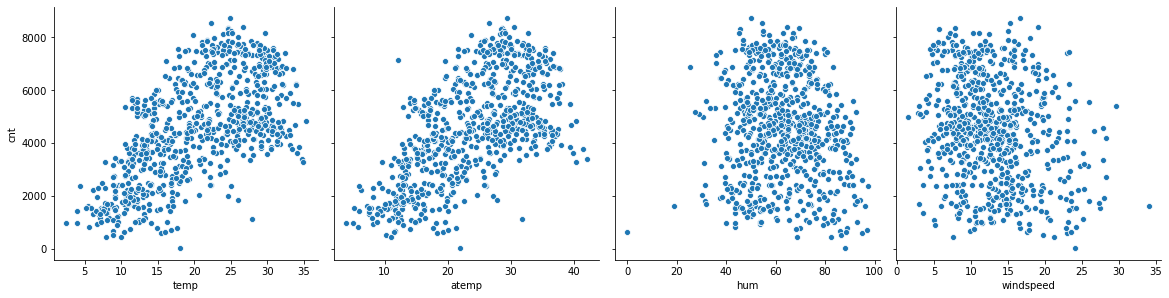

In [229]:
# visualising the variable using pairplot
sns.pairplot(bikesharing, x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt',size=4, aspect=1, kind='scatter')
plt.show()

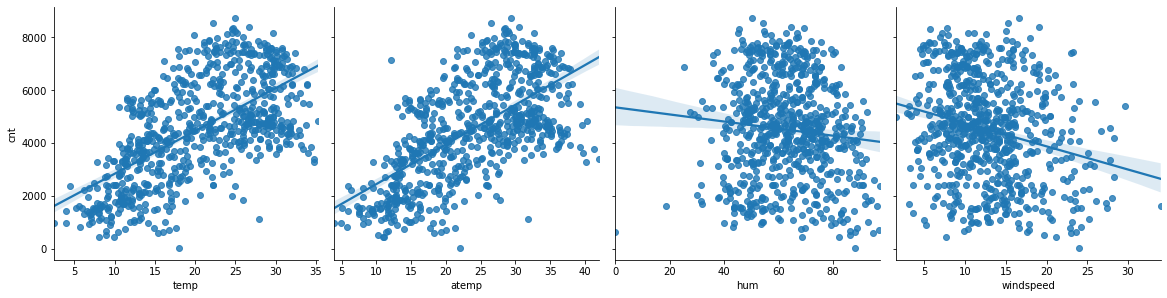

In [230]:
# visualising the variable using pairplot with kind regression
sns.pairplot(bikesharing, x_vars=['temp', 'atemp', 'hum','windspeed'], y_vars='cnt',size=4, aspect=1, kind='reg')
plt.show()

There is a linearity between temp and the cnt variable. Humidity and windspeed does not show much linearity with the cnt variable

In [231]:
bikesharing[['temp', 'atemp', 'hum','windspeed','weekday','weathersit','holiday','workingday']].corr()

,temp,atemp,hum,windspeed,weekday,weathersit,holiday,workingday
temp,1.000000,0.991696,0.128565,-0.158186,0.044876,-0.119503,-0.028764,0.002044
atemp,0.991696,1.000000,0.141512,-0.183876,0.037964,-0.120559,-0.032703,0.010657
hum,0.128565,0.141512,1.000000,-0.248506,0.008780,0.590277,-0.015662,0.053770
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.017230,0.039769,0.006257,-0.002453
weekday,0.044876,0.037964,0.008780,-0.017230,1.000000,0.034216,-0.020145,0.001588
weathersit,-0.119503,-0.120559,0.590277,0.039769,0.034216,1.000000,-0.034395,-0.026332
holiday,-0.028764,-0.032703,-0.015662,0.006257,-0.020145,-0.034395,1.000000,-0.257009
workingday,0.002044,0.010657,0.053770,-0.002453,0.001588,-0.026332,-0.257009,1.000000


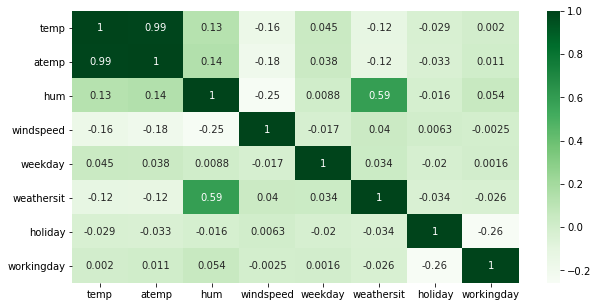

In [232]:
# plot heatmap to check the correlation among the variables
plt.figure(figsize=(10,5))
sns.heatmap(bikesharing[['temp', 'atemp', 'hum','windspeed','weekday','weathersit','holiday','workingday']].corr(), cmap="Greens", annot = True)
plt.show()

Based on the above heatmap the correlation among the variable seems to be less impressive.

### Performing Simple Linear Regression

In [233]:
bikesharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [234]:
X = bikesharing['temp']
y = bikesharing['cnt']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [236]:
X_train.head()

653    19.201653
576    29.246653
426    16.980847
728    10.489153
482    15.443347
Name: temp, dtype: float64

In [237]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [238]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [239]:
# Printing the parameters to get the slope of the regression line fitted
lr.params

const    1088.043909
temp      169.051138
dtype: float64

In [240]:
# summary of all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sun, 07 Mar 2021   Prob (F-statistic):           5.80e-61
Time:                        13:26:17   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1088.0439    191.181      5.691      0.0

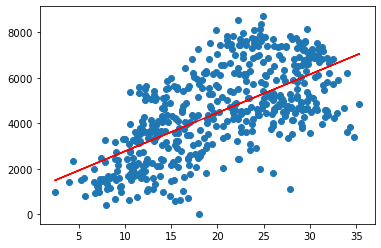

In [241]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1088.04 + 169.05*X_train, 'r')
plt.show()

In [242]:
# performing residual analysis to validate above assumptions
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

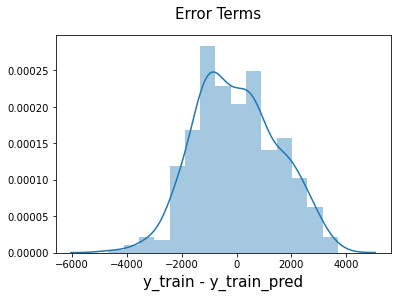

In [243]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

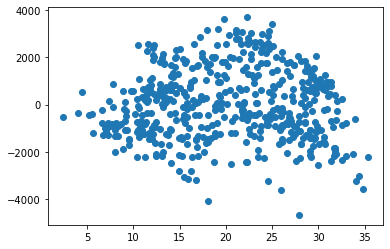

In [244]:
# check patterms in the residuals
plt.scatter(X_train,res)
plt.show()

In [245]:
# predictions on the test
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [246]:
y_pred.head()

184    6124.643122
535    6511.627041
299    4345.659337
221    6401.886988
152    6043.778017
dtype: float64

In [247]:
# deriving the mean squared error
mean_squared_error(y_test, y_pred)

2371107.6054548505

In [248]:
# square root of mean square error
np.sqrt(mean_squared_error(y_test, y_pred))

1539.8401233423067

In [249]:
# checking r-squared on the test data
r_squared = r2_score(y_test, y_pred)
r_squared

0.3392205219222133

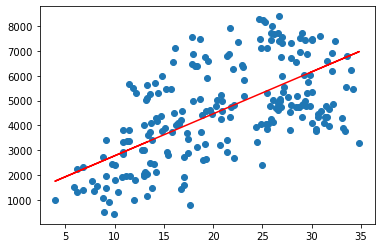

In [250]:
# Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 1088.04 + 169.05 * X_test, 'r')
plt.show()

In [251]:
bikesharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


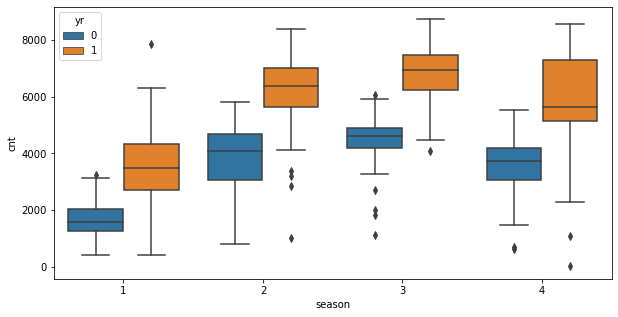

In [252]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = bikesharing)
plt.show()

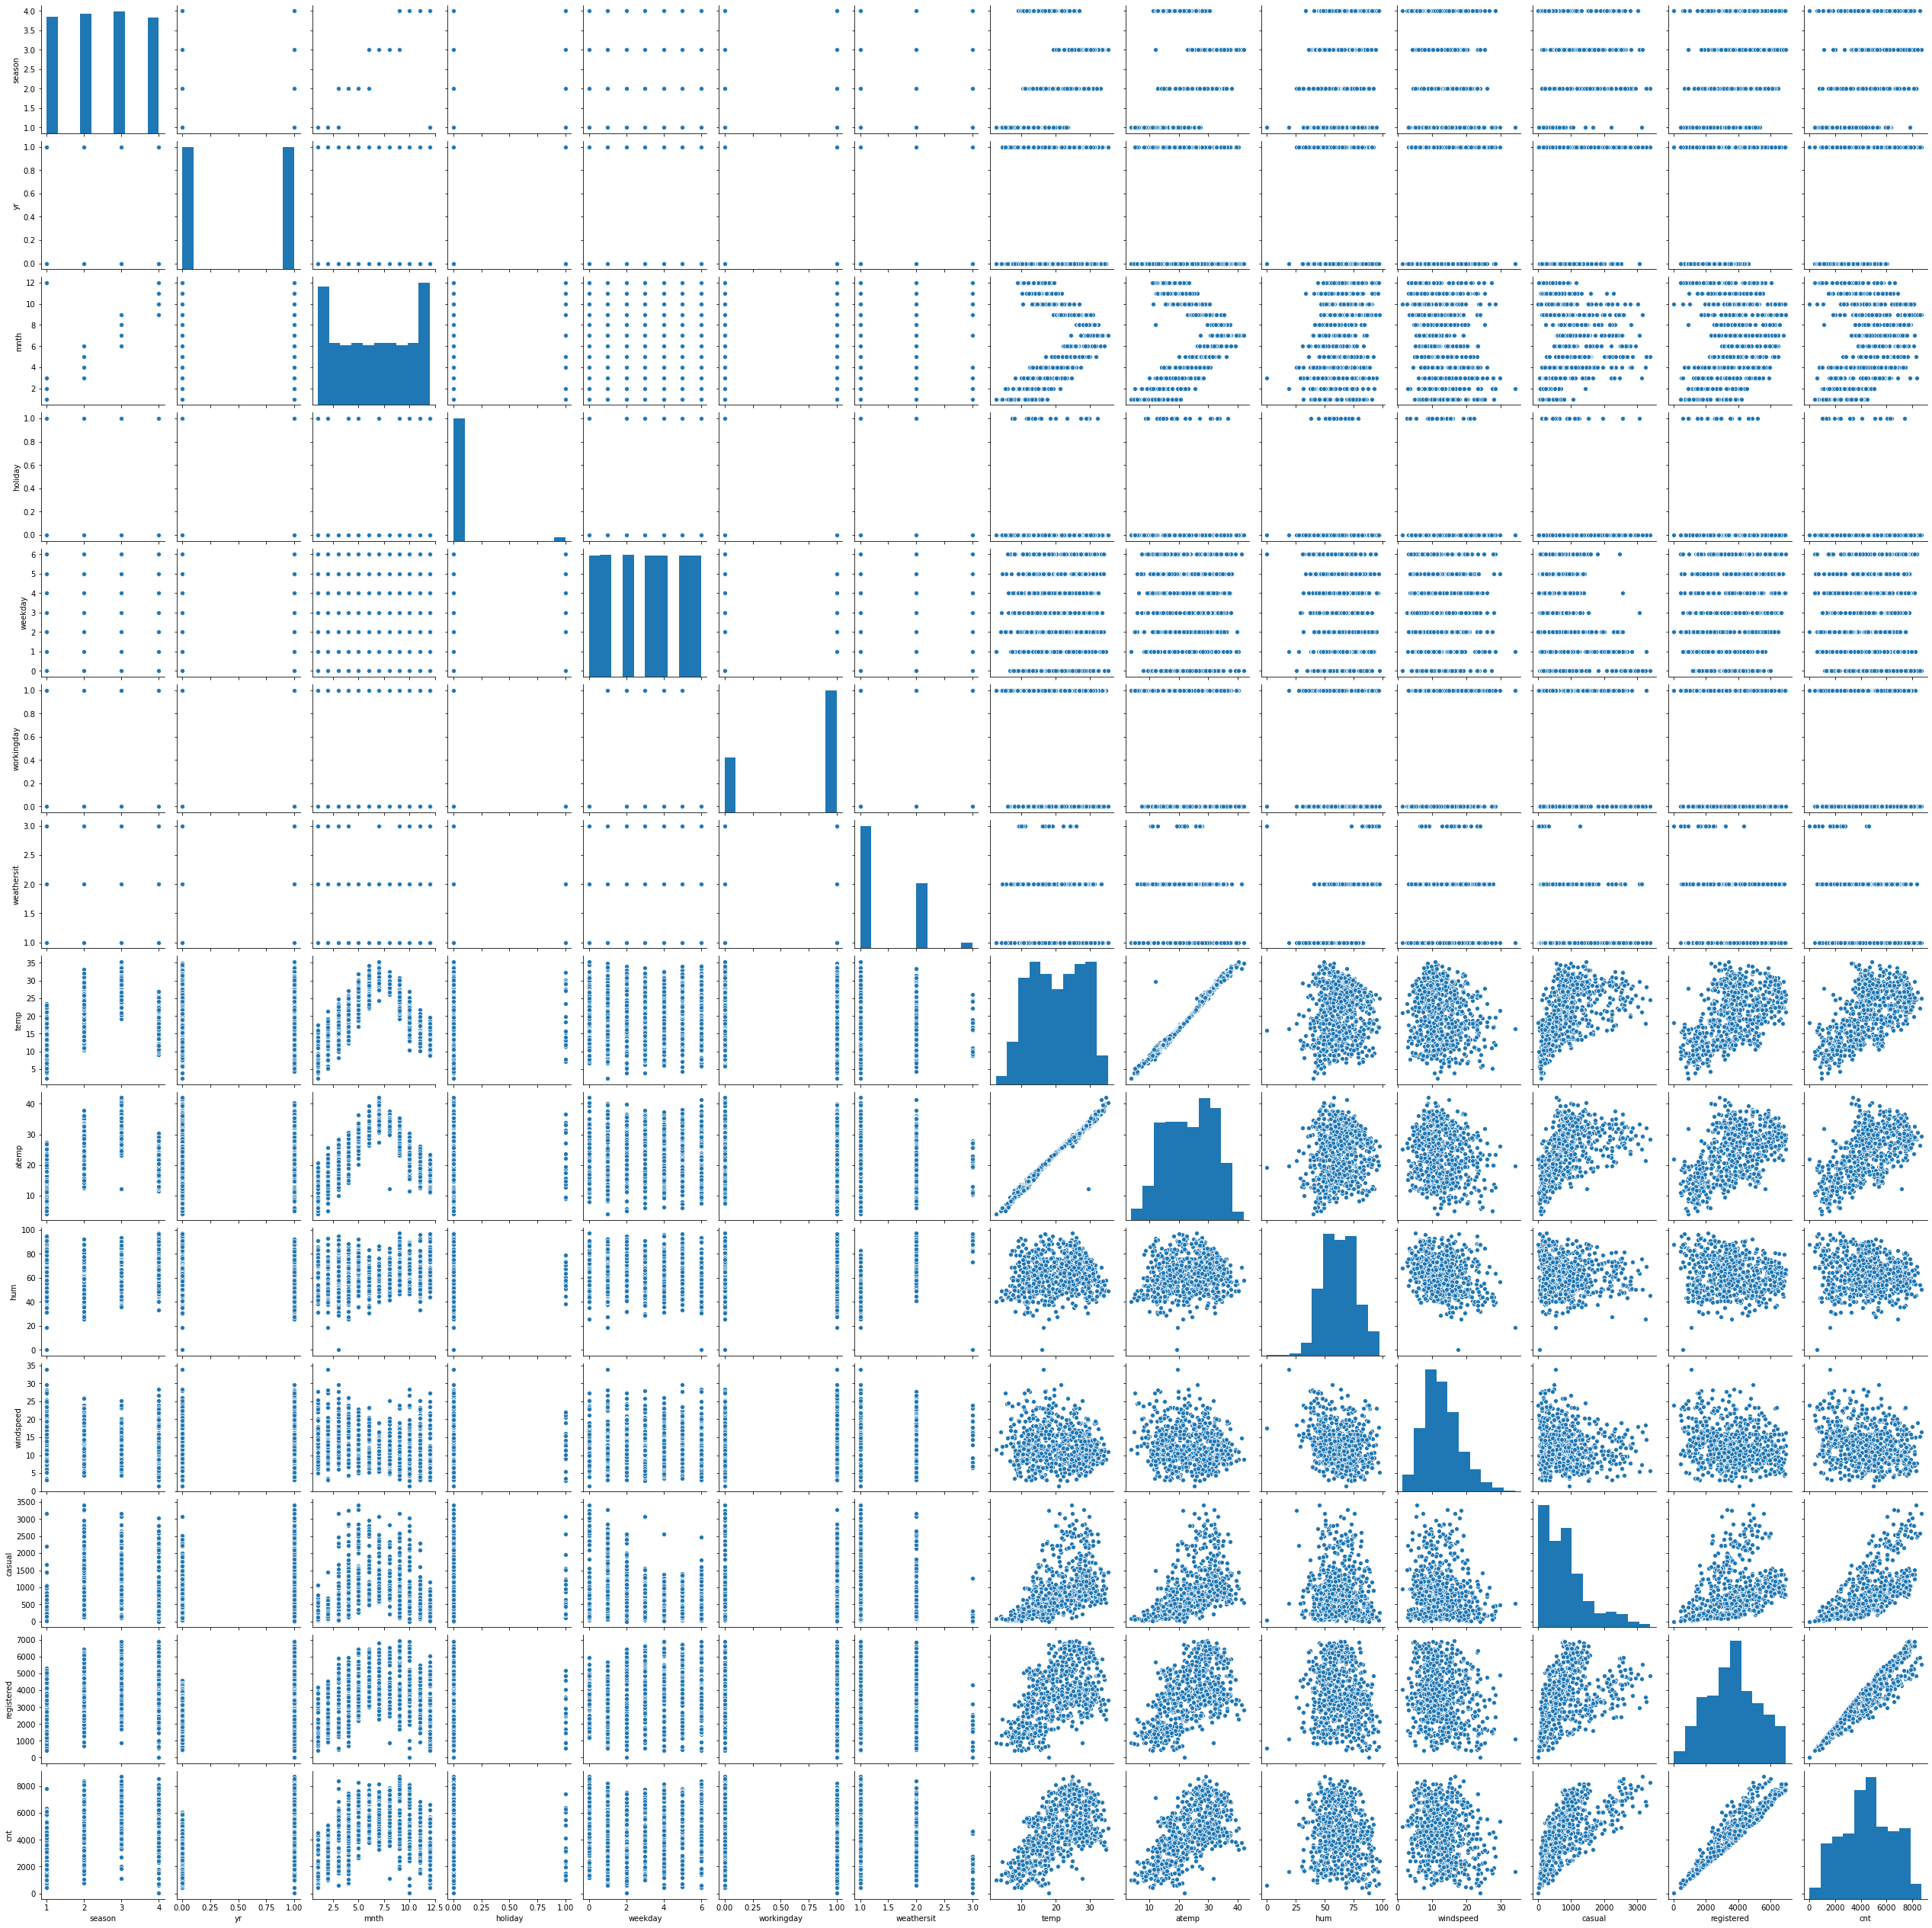

In [253]:
sns.pairplot(bikesharing)
plt.show()

Observations from above pairplot
 - There is some linear relationship between (temp, atemp) vs (casual, registered, cnt) variables
 - It can be inferred that registered customers tend to rent the bike more often when compared to others and there is a strong linear relationship between registered and cnt variables.

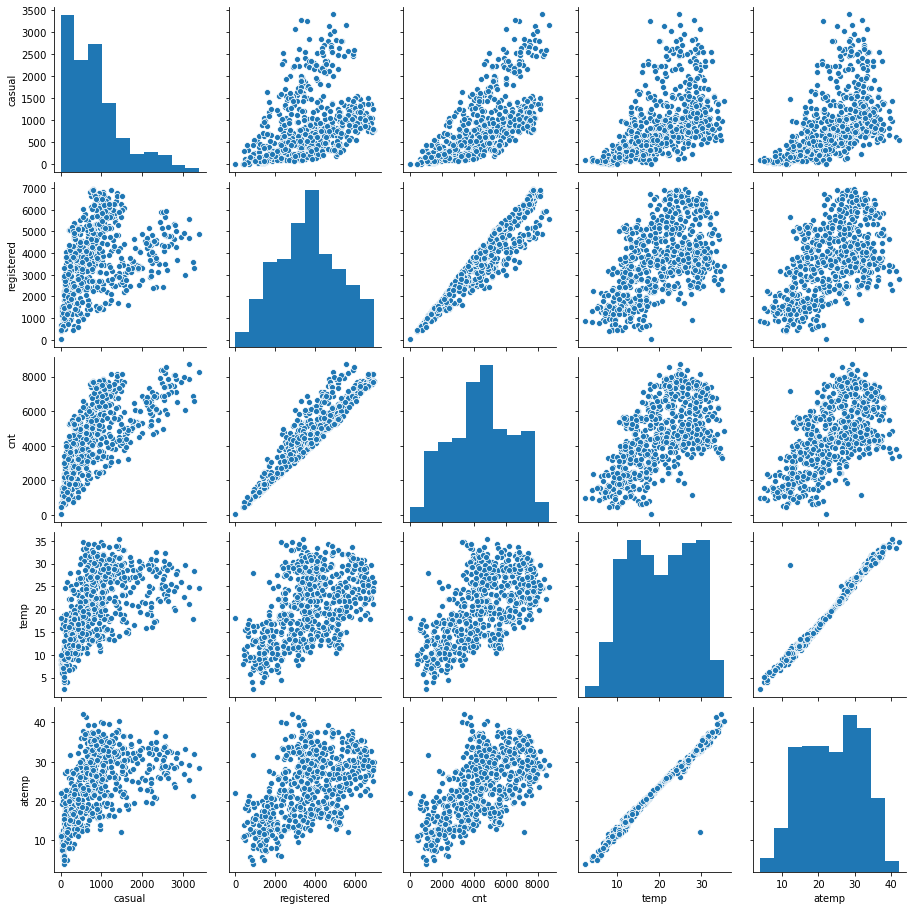

In [345]:
# based on above plot this can be narrowed down to required variables ('casual','registered','cnt','temp','atemp') 
# this is to get a clear picture on the linear regression
sns.pairplot(bikesharing[['casual','registered','cnt','temp','atemp']])
plt.show()

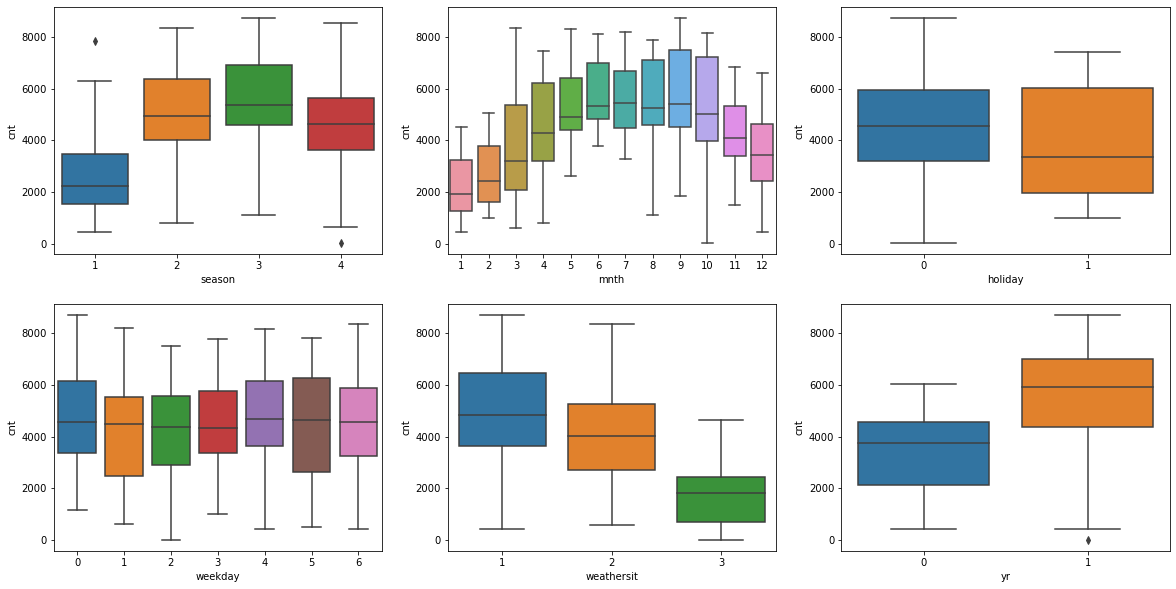

In [255]:
# plotting boxplot for visualising
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.show()

In [256]:
bikesharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [257]:
# converting the season variable values to categorical strings
# season (1:spring, 2:summer, 3:fall, 4:winter)
bikesharing.season.replace(1,'spring',inplace=True)
bikesharing.season.replace(2,'summer',inplace=True)
bikesharing.season.replace(3,'fall',inplace=True)
bikesharing.season.replace(4,'winter',inplace=True)

In [258]:
bikesharing.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [259]:
# converting the weathersit variable values to categorical strings
# season (1:spring, 2:summer, 3:fall, 4:winter)

# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

bikesharing.weathersit.replace(1,'Clear',inplace=True)
bikesharing.weathersit.replace(2,'Misty',inplace=True)
bikesharing.weathersit.replace(3,'Light Rain',inplace=True)
bikesharing.weathersit.replace(4,'Heavy Rain',inplace=True)

In [260]:
bikesharing.weathersit.value_counts()

Clear         463
Misty         246
Light Rain     21
Name: weathersit, dtype: int64

In [261]:
bikesharing.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [262]:
# converting the weekday variable values to categorical strings
# weekdays like 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat)
bikesharing.weekday.replace(0,'Sun',inplace=True)
bikesharing.weekday.replace(1,'Mon',inplace=True)
bikesharing.weekday.replace(2,'Tue',inplace=True)
bikesharing.weekday.replace(3,'Wed',inplace=True)
bikesharing.weekday.replace(4,'Thu',inplace=True)
bikesharing.weekday.replace(5,'Fri',inplace=True)
bikesharing.weekday.replace(6,'Sat',inplace=True)

In [263]:
bikesharing.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [264]:
# converting the mnth variable values to categorical strings
# weekdays like 1:Jan, 2:Feb, 3:Mar, 4:....)
bikesharing.mnth.replace(1,'Jan',inplace=True)
bikesharing.mnth.replace(2,'Feb',inplace=True)
bikesharing.mnth.replace(3,'Mar',inplace=True)
bikesharing.mnth.replace(4,'Apr',inplace=True)
bikesharing.mnth.replace(5,'May',inplace=True)
bikesharing.mnth.replace(6,'Jun',inplace=True)
bikesharing.mnth.replace(7,'Jul',inplace=True)
bikesharing.mnth.replace(8,'Aug',inplace=True)
bikesharing.mnth.replace(9,'Sep',inplace=True)
bikesharing.mnth.replace(10,'Oct',inplace=True)
bikesharing.mnth.replace(11,'Nov',inplace=True)
bikesharing.mnth.replace(12,'Dec',inplace=True)

In [265]:
bikesharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


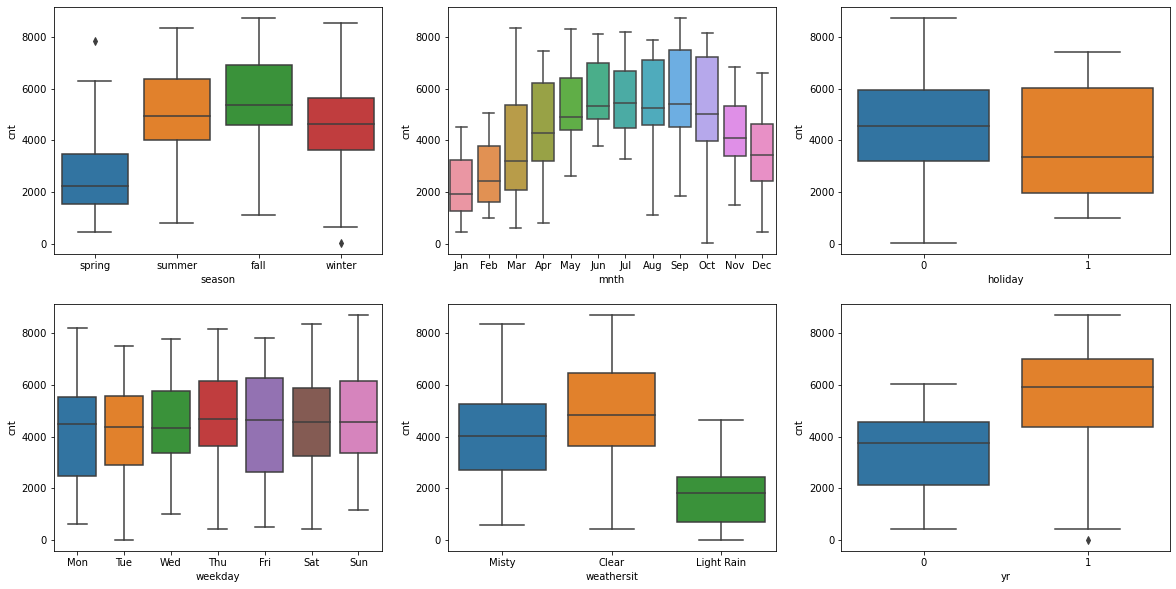

In [266]:
# plotting boxplot for visualising
plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.show()

In [267]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status'
weathersit_dum_var = pd.get_dummies(bikesharing['weathersit'])

In [268]:
weathersit_dum_var.head()

,Clear,Light Rain,Misty
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [269]:
# we need k-1 dummies to identify the weather uniquely. 
# So, dropping the first column from 'weathersit_dum_var' using 'drop_first = True'
weathersit_dum_var = pd.get_dummies(bikesharing['weathersit'], drop_first = True)

In [270]:
# Adding the results to the original bikesharing dataframe
bikesharing = pd.concat([bikesharing, weathersit_dum_var], axis = 1)

In [271]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
season_dum_var = pd.get_dummies(bikesharing['season'])

In [272]:
season_dum_var.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [273]:
# we need k-1 dummies to identify the seasons uniquely. 
# So, dropping the first column from 'season_dum_var' using 'drop_first = True'
season_dum_var = pd.get_dummies(bikesharing['season'], drop_first = True)

In [274]:
# Adding the results to the original bikesharing dataframe
bikesharing = pd.concat([bikesharing, season_dum_var], axis = 1)

In [275]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status'
weekday_dum_var = pd.get_dummies(bikesharing['weekday'])
mnth_dum_var = pd.get_dummies(bikesharing['mnth'])

In [276]:
weekday_dum_var.head(), mnth_dum_var.head()

(   Fri  Mon  Sat  Sun  Thu  Tue  Wed
 0    0    1    0    0    0    0    0
 1    0    0    0    0    0    1    0
 2    0    0    0    0    0    0    1
 3    0    0    0    0    1    0    0
 4    1    0    0    0    0    0    0,
    Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
 0    0    0    0    0    1    0    0    0    0    0    0    0
 1    0    0    0    0    1    0    0    0    0    0    0    0
 2    0    0    0    0    1    0    0    0    0    0    0    0
 3    0    0    0    0    1    0    0    0    0    0    0    0
 4    0    0    0    0    1    0    0    0    0    0    0    0)

In [277]:
# we need k-1 dummies to identify the seasons uniquely. 
# So, dropping the first column from 'season_dum_var' using 'drop_first = True'
weekday_dum_var = pd.get_dummies(bikesharing['weekday'], drop_first = True)
mnth_dum_var = pd.get_dummies(bikesharing['mnth'], drop_first = True)

In [278]:
weekday_dum_var.head(), mnth_dum_var.head()

(   Mon  Sat  Sun  Thu  Tue  Wed
 0    1    0    0    0    0    0
 1    0    0    0    0    1    0
 2    0    0    0    0    0    1
 3    0    0    0    1    0    0
 4    0    0    0    0    0    0,
    Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
 0    0    0    0    1    0    0    0    0    0    0    0
 1    0    0    0    1    0    0    0    0    0    0    0
 2    0    0    0    1    0    0    0    0    0    0    0
 3    0    0    0    1    0    0    0    0    0    0    0
 4    0    0    0    1    0    0    0    0    0    0    0)

In [279]:
# Adding the results to the original bikesharing dataframe
bikesharing = pd.concat([bikesharing, weekday_dum_var], axis = 1)
bikesharing = pd.concat([bikesharing, mnth_dum_var], axis = 1)

In [280]:
bikesharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,01-01-2018,spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,0
1,02-01-2018,spring,0,Jan,0,Tue,1,Misty,14.902598,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,...,0,0,1,0,0,0,0,0,0,0
4,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,...,0,0,1,0,0,0,0,0,0,0


In [281]:
# dropping the columns 'mnth' & 'weekday' as we have created the dummies for these
bikesharing.drop(['mnth'], axis = 1, inplace = True)
bikesharing.drop(['weekday'], axis = 1, inplace = True)

In [282]:
# dropping the columns 'weathersit' & 'season' as we have created the dummies for these
bikesharing.drop(['weathersit'], axis = 1, inplace = True)
bikesharing.drop(['season'], axis = 1, inplace = True)

In [283]:
# as of now we don't need the dteday column for this analysis. So, dropping this column
bikesharing.drop(['dteday'], axis = 1, inplace = True)

In [284]:
# after dropping the columns
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,1,0,0,0,0,0,0,0


In [285]:
bikesharing.shape

(730, 32)

In [286]:
# splitting the dataset to training and test dfs
bikesharing_train, bikesharing_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [287]:
bikesharing_train.head(), bikesharing_test.head()

(     yr  holiday  workingday       temp    atemp      hum  windspeed  casual  \
 653   1        0           1  19.201653  23.0423  55.8333  12.208807     922   
 576   1        0           1  29.246653  33.1448  70.4167  11.083475     968   
 426   1        0           0  16.980847  20.6746  62.1250  10.792293     956   
 728   1        0           1  10.489153  11.5850  48.3333  23.500518     364   
 482   1        0           0  15.443347  18.8752  48.9583   8.708325    1120   
 
      registered   cnt  ...  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep  
 653        6612  7534  ...    0    0    0    0    0    0    0    0    1    0  
 576        6248  7216  ...    0    0    0    1    0    0    0    0    0    0  
 426        3110  4066  ...    0    0    0    0    0    1    0    0    0    0  
 728        1432  1796  ...    1    0    0    0    0    0    0    0    0    0  
 482        3100  4220  ...    0    0    0    0    0    0    0    0    0    0  
 
 [5 rows x 32 columns],
      

In [288]:
# scaling the features
scaler = MinMaxScaler()

In [289]:
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,1,0,0,0,0,0,0,0


In [290]:
# Applying scaler() to all the columns except the 'dummy' and '0-1' variables
num_vars = ['temp', 'atemp', 'hum','windspeed','casual','registered','cnt']
bikesharing_train[num_vars] = scaler.fit_transform(bikesharing_train[num_vars])

In [291]:
bikesharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,...,0,0,0,0,0,0,0,0,0,0


In [292]:
bikesharing_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


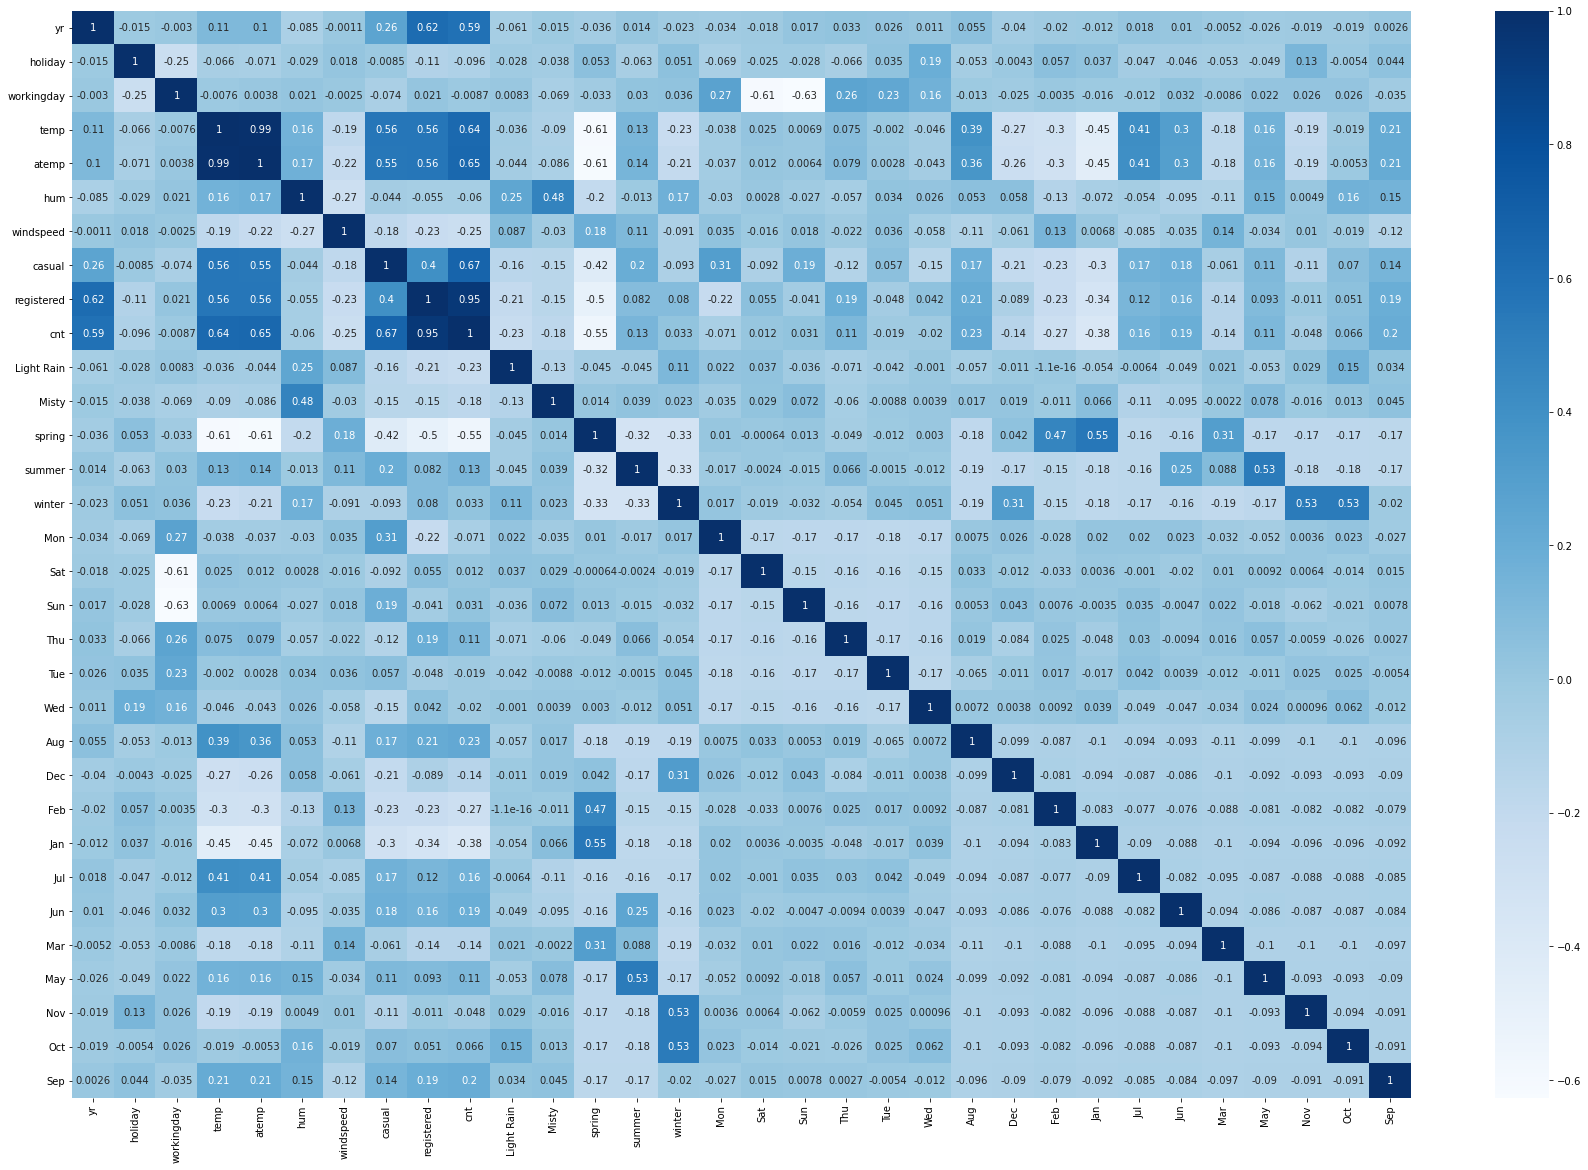

In [293]:
# checking the correlation among the variables using heatmap
plt.figure(figsize = (30, 20))
sns.heatmap(bikesharing_train.corr(), annot = True, cmap="Blues")
plt.show()

In [294]:
# Dividing the X_train and y_train
y_train = bikesharing_train.pop('cnt')
X_train = bikesharing_train

In [295]:
# Building the first linear model with all the variables for peforming multiple linear regression
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const        -4.579670e-16
yr            2.220446e-16
holiday       6.106227e-16
workingday    1.013079e-15
temp          1.554312e-15
atemp        -8.881784e-16
hum           5.551115e-16
windspeed     2.498002e-16
casual        3.774735e-01
registered    7.968247e-01
Light Rain    2.359224e-16
Misty         1.908196e-16
spring        4.024558e-16
summer        2.775558e-17
winter        6.938894e-17
Mon          -1.387779e-17
Sat           4.024558e-16
Sun           5.273559e-16
Thu          -6.938894e-17
Tue          -1.387779e-16
Wed          -4.163336e-17
Aug          -6.245005e-17
Dec          -1.786765e-16
Feb          -2.289835e-16
Jan          -4.475587e-16
Jul          -6.036838e-16
Jun          -2.636780e-16
Mar          -1.821460e-16
May          -3.469447e-17
Nov          -1.942890e-16
Oct          -3.885781e-16
Sep          -3.191891e-16
dtype: float64

In [296]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.410e+29
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:41   Log-Likelihood:                 16593.
No. Observations:                 510   AIC:                        -3.312e+04
Df Residuals:                     478   BIC:                        -3.299e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.58e-16   1.81e-15     -0.253      0.800   -4.01e-15     3.1e-15
yr           2.22e-16   2.86e-16      0.775      0.439   -3.41e-16    7.85e-16
holiday     6.106e-16   1.37e-15      0.447      0.655   -2.07e-15    3.29e-15
workingday  1.013e-15   1.48e-15      0.685      0.494   -1.89e-15    3.92e-15
temp        1.554e-15   3.01e-15      0.516      0.606   -4.37e-15    7.48e-15
atemp      -8.882e-16    2.9e-15     -0.306      0.759   -6.58e-15    4.81e-15
hum         5.551e-16   8.22e-16      0.676      0.500   -1.06e-15    2.17e-15
windspeed   2.498e-16   5.82e-16      0.429      0.668   -8.93e-16    1.39e-15
casual         0.3775   6.82e-16   5.53e+14      0.000       0.377       0.377
registered     0.7968   8.92e-16   8.93e+14      0.000       0.797       0.797
Light Rain  2.359e-16   6.03e-16      0.391      0.696    -9.5e-16    1.42e-15
Misty       1.908e-16   2.26e-16      0.844      0.399   -2.53e-16    6.35e-16
spring      4.025e-16   6.31e-16      0.637      0.524   -8.38e-16    1.64e-15
summer      2.776e-17   5.53e-16      0.050      0.960   -1.06e-15    1.12e-15
winter      6.939e-17   5.98e-16      0.116      0.908    -1.1e-15    1.24e-15
Mon        -1.388e-17   3.69e-16     -0.038      0.970    -7.4e-16    7.12e-16
Sat         4.025e-16   1.49e-15      0.270      0.787   -2.52e-15    3.33e-15
Sun         5.274e-16   1.49e-15      0.354      0.723    -2.4e-15    3.45e-15
Thu        -6.939e-17   3.12e-16     -0.223      0.824   -6.82e-16    5.43e-16
Tue        -1.388e-16   3.21e-16     -0.432      0.666    -7.7e-16    4.92e-16
Wed        -4.163e-17   3.18e-16     -0.131      0.896   -6.66e-16    5.82e-16
Aug        -6.245e-17   7.14e-16     -0.087      0.930   -1.47e-15    1.34e-15
Dec        -1.787e-16   7.06e-16     -0.253      0.800   -1.57e-15    1.21e-15
Feb         -2.29e-16   6.92e-16     -0.331      0.741   -1.59e-15    1.13e-15
Jan        -4.476e-16   7.06e-16     -0.634      0.526   -1.83e-15     9.4e-16
Jul        -6.037e-16    7.4e-16     -0.815      0.415   -2.06e-15    8.51e-16
Jun        -2.637e-16   5.33e-16     -0.495      0.621   -1.31e-15    7.84e-16
Mar        -1.821e-16   5.15e-16     -0.354      0.724   -1.19e-15    8.29e-16
May        -3.469e-17   4.45e-16     -0.078      0.938   -9.08e-16    8.39e-16
Nov        -1.943e-16   7.64e-16     -0.254      0.799   -1.69e-15    1.31e-15
Oct        -3.886e-16   7.53e-16     -0.516      0.606   -1.87e-15    1.09e-15
Sep        -3.192e-16   6.77e-16     -0.471      0.638   -1.65e-15    1.01e-15
==============================================================================
Omnibus:                        9.897   Durbin-Watson:                   0.111
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.654
Skew:                           0.301   Prob(JB):                      0.00801
Ku

In [297]:
# Checking for the VIF values of the feature variables. 
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,455.40
4,atemp,383.92
2,workingday,70.14
5,hum,42.05
8,registered,36.94
11,spring,13.58
16,Sun,13.29
13,winter,13.14
15,Sat,12.93
12,summer,10.12


In [298]:
# Generally the  features with VIF less than 5 are expected. So, we may have to drop some variable and update the model.

### Dropping the variable and updating the model

It can be seen from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `holiday` as it has a very high p-value of `0.971`. So, drop this variable.

In [299]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('holiday', 1,)

In [300]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [301]:
# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.646e+29
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:41   Log-Likelihood:                 16487.
No. Observations:                 510   AIC:                        -3.291e+04
Df Residuals:                     479   BIC:                        -3.278e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.886e-16   1.41e-15      0.275      0.784   -2.39e-15    3.17e-15
yr          1.787e-16   3.52e-16      0.508      0.612   -5.13e-16     8.7e-16
workingday  5.135e-16   7.49e-16      0.685      0.494   -9.59e-16    1.99e-15
temp                0   3.71e-15          0      1.000   -7.29e-15    7.29e-15
atemp        2.22e-16   3.56e-15      0.062      0.950   -6.78e-15    7.23e-15
hum         5.551e-16   1.01e-15      0.550      0.583   -1.43e-15    2.54e-15
windspeed   2.012e-16   7.15e-16      0.281      0.779    -1.2e-15    1.61e-15
casual         0.3775   8.39e-16    4.5e+14      0.000       0.377       0.377
registered     0.7968   1.09e-15    7.3e+14      0.000       0.797       0.797
Light Rain -8.327e-17   7.41e-16     -0.112      0.911   -1.54e-15    1.37e-15
Misty       3.903e-16   2.78e-16      1.406      0.160   -1.55e-16    9.36e-16
spring     -3.469e-16   7.77e-16     -0.447      0.655   -1.87e-15    1.18e-15
summer      5.551e-17   6.81e-16      0.082      0.935   -1.28e-15    1.39e-15
winter     -3.747e-16   7.35e-16     -0.510      0.610   -1.82e-15    1.07e-15
Mon         5.829e-16   4.54e-16      1.284      0.200   -3.09e-16    1.48e-15
Sat         6.384e-16   8.32e-16      0.767      0.443   -9.96e-16    2.27e-15
Sun         8.119e-16   8.25e-16      0.985      0.325   -8.08e-16    2.43e-15
Thu         4.302e-16   3.83e-16      1.123      0.262   -3.23e-16    1.18e-15
Tue         4.718e-16   3.95e-16      1.195      0.233   -3.04e-16    1.25e-15
Wed         3.747e-16   3.91e-16      0.959      0.338   -3.93e-16    1.14e-15
Aug          2.29e-16   8.78e-16      0.261      0.794    -1.5e-15    1.95e-15
Dec         5.187e-16   8.68e-16      0.598      0.550   -1.19e-15    2.22e-15
Feb         3.192e-16   8.52e-16      0.375      0.708   -1.35e-15    1.99e-15
Jan         5.898e-17   8.68e-16      0.068      0.946   -1.65e-15    1.77e-15
Jul        -4.163e-17   9.11e-16     -0.046      0.964   -1.83e-15    1.75e-15
Jun         2.498e-16   6.56e-16      0.381      0.703   -1.04e-15    1.54e-15
Mar         2.671e-16   6.33e-16      0.422      0.673   -9.77e-16    1.51e-15
May         1.388e-17   5.47e-16      0.025      0.980   -1.06e-15    1.09e-15
Nov         3.192e-16   9.37e-16      0.341      0.733   -1.52e-15    2.16e-15
Oct         5.655e-16   9.26e-16      0.611      0.542   -1.25e-15    2.38e-15
Sep         2.567e-16   8.33e-16      0.308      0.758   -1.38e-15    1.89e-15
==============================================================================
Omnibus:                        1.217   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.544   Jarque-Bera (JB):                1.151
Skew:                           0.116   Prob(JB):                        0.563
Kurtosis:                       3.011   Cond. No.                         97.7
==

In [302]:
# checking the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,449.81
3,atemp,383.71
4,hum,39.98
7,registered,36.63
1,workingday,29.41
12,winter,12.96
10,spring,12.56
11,summer,8.56
6,casual,7.36
19,Aug,6.64


In [303]:
# there is another variable with high p-value and that is 'Jul'
# dropping the variable 'Jul'
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['holiday','Jul'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [304]:
# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.460e+29
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:41   Log-Likelihood:                 16580.
No. Observations:                 510   AIC:                        -3.310e+04
Df Residuals:                     480   BIC:                        -3.297e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.327e-17   1.13e-15      0.074      0.941   -2.14e-15    2.31e-15
yr          5.031e-17   2.93e-16      0.172      0.864   -5.25e-16    6.25e-16
workingday  1.422e-16   6.23e-16      0.228      0.819   -1.08e-15    1.37e-15
temp       -1.554e-15   3.02e-15     -0.514      0.607   -7.49e-15    4.38e-15
atemp       2.998e-15   2.95e-15      1.015      0.311   -2.81e-15     8.8e-15
hum         2.498e-16    8.4e-16      0.298      0.766    -1.4e-15     1.9e-15
windspeed     6.8e-16   5.92e-16      1.148      0.252   -4.84e-16    1.84e-15
casual         0.3775   6.97e-16   5.42e+14      0.000       0.377       0.377
registered     0.7968   9.08e-16   8.77e+14      0.000       0.797       0.797
Light Rain  3.469e-16   6.17e-16      0.563      0.574   -8.64e-16    1.56e-15
Misty       2.828e-16   2.31e-16      1.224      0.221   -1.71e-16    7.37e-16
spring      4.302e-16   5.87e-16      0.733      0.464   -7.23e-16    1.58e-15
summer      3.331e-16    4.3e-16      0.775      0.439   -5.11e-16    1.18e-15
winter      4.649e-16   5.92e-16      0.785      0.433   -6.99e-16    1.63e-15
Mon         4.163e-16   3.76e-16      1.106      0.269   -3.23e-16    1.16e-15
Sat         1.665e-16   6.91e-16      0.241      0.810   -1.19e-15    1.52e-15
Sun         2.359e-16   6.85e-16      0.345      0.731   -1.11e-15    1.58e-15
Thu         1.943e-16   3.19e-16      0.610      0.542   -4.32e-16    8.21e-16
Tue         6.939e-17   3.28e-16      0.212      0.833   -5.75e-16    7.14e-16
Wed         4.163e-17   3.25e-16      0.128      0.898   -5.97e-16     6.8e-16
Aug         3.096e-16   3.96e-16      0.782      0.435   -4.69e-16    1.09e-15
Dec         2.776e-17   6.76e-16      0.041      0.967    -1.3e-15    1.36e-15
Feb         -2.22e-16   6.92e-16     -0.321      0.748   -1.58e-15    1.14e-15
Jan        -9.714e-17   7.11e-16     -0.137      0.891   -1.49e-15     1.3e-15
Jun         1.353e-16   4.03e-16      0.335      0.737   -6.57e-16    9.28e-16
Mar         2.082e-17   5.02e-16      0.041      0.967   -9.67e-16    1.01e-15
May         3.053e-16   4.18e-16      0.731      0.465   -5.16e-16    1.13e-15
Nov         6.245e-17   7.17e-16      0.087      0.931   -1.35e-15    1.47e-15
Oct        -2.359e-16   6.86e-16     -0.344      0.731   -1.58e-15    1.11e-15
Sep         1.284e-16   4.42e-16      0.290      0.772   -7.41e-16    9.97e-16
==============================================================================
Omnibus:                        0.879   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.689
Skew:                           0.003   Prob(JB):                        0.708
Kurtosis:                       3.180   Cond. No.                         96.5
==============================================================================

W

In [305]:
# checking the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,421.96
3,atemp,380.12
4,hum,39.82
7,registered,36.57
1,workingday,28.04
12,winter,12.33
10,spring,10.97
6,casual,7.35
15,Sun,6.18
14,Sat,6.17


In [306]:
# there is another variable with high p-value and that is 'hum'
# dropping the variable 'hum'
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['holiday','Jul','hum'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [307]:
# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.962e+30
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:41   Log-Likelihood:                 17337.
No. Observations:                 510   AIC:                        -3.462e+04
Df Residuals:                     481   BIC:                        -3.449e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.498e-16   2.43e-16      1.028      0.304   -2.27e-16    7.27e-16
yr          2.168e-16   6.62e-17      3.277      0.001    8.68e-17    3.47e-16
workingday -3.192e-16   1.41e-16     -2.262      0.024   -5.96e-16   -4.19e-17
temp        7.772e-16   6.83e-16      1.138      0.256   -5.65e-16    2.12e-15
atemp      -7.772e-16   6.69e-16     -1.162      0.246   -2.09e-15    5.37e-16
windspeed  -3.886e-16   1.28e-16     -3.029      0.003   -6.41e-16   -1.37e-16
casual         0.3775   1.57e-16    2.4e+15      0.000       0.377       0.377
registered     0.7968   2.03e-16   3.92e+15      0.000       0.797       0.797
Light Rain  2.082e-16   1.34e-16      1.557      0.120   -5.45e-17    4.71e-16
Misty       3.066e-16   4.52e-17      6.779      0.000    2.18e-16    3.95e-16
spring      2.498e-16   1.33e-16      1.880      0.061   -1.13e-17    5.11e-16
summer     -1.804e-16   9.62e-17     -1.875      0.061   -3.69e-16    8.66e-18
winter     -4.302e-16   1.34e-16     -3.213      0.001   -6.93e-16   -1.67e-16
Mon        -2.776e-17   8.53e-17     -0.326      0.745   -1.95e-16     1.4e-16
Sat        -5.274e-16   1.57e-16     -3.367      0.001   -8.35e-16    -2.2e-16
Sun        -4.025e-16   1.55e-16     -2.595      0.010   -7.07e-16   -9.77e-17
Thu                 0   7.22e-17          0      1.000   -1.42e-16    1.42e-16
Tue         8.327e-17   7.43e-17      1.121      0.263   -6.27e-17    2.29e-16
Wed         2.914e-16   7.36e-17      3.960      0.000    1.47e-16    4.36e-16
Aug        -9.368e-17   8.92e-17     -1.050      0.294   -2.69e-16    8.16e-17
Dec         6.124e-16   1.51e-16      4.060      0.000    3.16e-16    9.09e-16
Feb        -6.939e-18   1.56e-16     -0.044      0.965   -3.14e-16       3e-16
Jan         5.204e-17    1.6e-16      0.326      0.744   -2.62e-16    3.66e-16
Jun         4.857e-17   9.12e-17      0.532      0.595   -1.31e-16    2.28e-16
Mar         3.123e-17   1.13e-16      0.275      0.783   -1.92e-16    2.54e-16
May         6.939e-18   9.41e-17      0.074      0.941   -1.78e-16    1.92e-16
Nov         3.469e-16   1.61e-16      2.153      0.032    3.04e-17    6.64e-16
Oct         4.753e-16   1.54e-16      3.095      0.002    1.74e-16    7.77e-16
Sep        -6.939e-18   9.79e-17     -0.071      0.944   -1.99e-16    1.85e-16
==============================================================================
Omnibus:                        6.542   Durbin-Watson:                   1.105
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.683
Skew:                          -0.276   Prob(JB):                       0.0354
Kurtosis:                       2.904   Cond. No.                         91.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is

In [308]:
# checking the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,412.88
3,atemp,379.91
6,registered,36.27
1,workingday,26.46
11,winter,12.21
9,spring,10.75
5,casual,7.31
0,yr,6.01
13,Sat,5.89
14,Sun,5.87


In [309]:
# there is another variable with high p-value and that is 'Tue'
# dropping the variable 'Tue'
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['holiday','Jul','hum','Tue'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [310]:
# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.291e+30
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:42   Log-Likelihood:                 17343.
No. Observations:                 510   AIC:                        -3.463e+04
Df Residuals:                     482   BIC:                        -3.451e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.718e-16   2.34e-16     -2.016      0.044   -9.32e-16   -1.19e-17
yr          4.059e-16   6.44e-17      6.302      0.000    2.79e-16    5.32e-16
workingday  1.249e-16   1.39e-16      0.898      0.370   -1.48e-16    3.98e-16
temp        -1.11e-15   6.73e-16     -1.649      0.100   -2.43e-15    2.13e-16
atemp       1.221e-15    6.6e-16      1.852      0.065   -7.46e-17    2.52e-15
windspeed   4.996e-16   1.26e-16      3.951      0.000    2.51e-16    7.48e-16
casual         0.3775   1.51e-16   2.49e+15      0.000       0.377       0.377
registered     0.7968   1.95e-16   4.08e+15      0.000       0.797       0.797
Light Rain -1.804e-16   1.31e-16     -1.381      0.168   -4.37e-16    7.63e-17
Misty       7.373e-18   4.46e-17      0.165      0.869   -8.02e-17     9.5e-17
spring      8.327e-17   1.31e-16      0.636      0.525   -1.74e-16    3.41e-16
summer     -1.943e-16   9.48e-17     -2.050      0.041   -3.81e-16   -8.02e-18
winter      4.163e-17   1.32e-16      0.316      0.752   -2.17e-16       3e-16
Mon         5.551e-17   6.87e-17      0.808      0.419   -7.94e-17     1.9e-16
Sat         3.192e-16   1.51e-16      2.111      0.035    2.21e-17    6.16e-16
Sun         6.939e-17   1.48e-16      0.470      0.639   -2.21e-16    3.59e-16
Thu        -4.163e-17   6.32e-17     -0.658      0.511   -1.66e-16    8.26e-17
Wed         2.776e-17   6.37e-17      0.436      0.663   -9.75e-17    1.53e-16
Aug          3.99e-17   8.78e-17      0.454      0.650   -1.33e-16    2.12e-16
Dec        -2.082e-17   1.48e-16     -0.140      0.889   -3.12e-16    2.71e-16
Feb         3.678e-16   1.54e-16      2.390      0.017    6.55e-17     6.7e-16
Jan         3.816e-16   1.57e-16      2.427      0.016    7.26e-17    6.91e-16
Jun         1.284e-16   8.99e-17      1.428      0.154   -4.83e-17    3.05e-16
Mar         2.463e-16   1.12e-16      2.206      0.028    2.69e-17    4.66e-16
May         2.359e-16   9.28e-17      2.543      0.011    5.36e-17    4.18e-16
Nov         -1.11e-16   1.58e-16     -0.701      0.484   -4.22e-16       2e-16
Oct        -6.592e-17   1.51e-16     -0.436      0.663   -3.63e-16    2.31e-16
Sep         6.939e-17   9.64e-17      0.720      0.472    -1.2e-16    2.59e-16
==============================================================================
Omnibus:                       28.795   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.059
Skew:                          -0.162   Prob(JB):                      0.00146
Kurtosis:                       2.286   Cond. No.                         90.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model looks better than the previous models with lesser p-value for most of the attributes

In [311]:
# there is another variable with high p-value and that is 'Jun'
# dropping the variable 'Jun'
# Dropping highly correlated variables and insignificant variables
X = X_train.drop(['holiday','Jul','hum','Tue','Jun'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.188e+30
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:42   Log-Likelihood:                 17204.
No. Observations:                 510   AIC:                        -3.435e+04
Df Residuals:                     483   BIC:                        -3.424e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.943e-16   3.05e-16      0.637      0.524   -4.05e-16    7.93e-16
yr          5.811e-17   8.41e-17      0.691      0.490   -1.07e-16    2.23e-16
workingday  9.368e-17   1.83e-16      0.513      0.608   -2.65e-16    4.52e-16
temp        1.332e-15   8.67e-16      1.536      0.125   -3.72e-16    3.04e-15
atemp      -8.882e-16    8.6e-16     -1.033      0.302   -2.58e-15    8.01e-16
windspeed    4.58e-16   1.66e-16      2.767      0.006    1.33e-16    7.83e-16
casual         0.3775   1.99e-16    1.9e+15      0.000       0.377       0.377
registered     0.7968   2.55e-16   3.13e+15      0.000       0.797       0.797
Light Rain -5.135e-16   1.72e-16     -2.994      0.003    -8.5e-16   -1.76e-16
Misty       4.406e-16   5.85e-17      7.530      0.000    3.26e-16    5.56e-16
spring     -1.665e-16    1.7e-16     -0.982      0.327      -5e-16    1.67e-16
summer     -3.469e-16    1.2e-16     -2.901      0.004   -5.82e-16   -1.12e-16
winter     -3.192e-16   1.72e-16     -1.852      0.065   -6.58e-16    1.95e-17
Mon        -1.388e-16   9.01e-17     -1.540      0.124   -3.16e-16    3.82e-17
Sat        -1.388e-17   1.99e-16     -0.070      0.944   -4.04e-16    3.76e-16
Sun        -1.041e-16   1.94e-16     -0.537      0.591   -4.85e-16    2.77e-16
Thu         2.151e-16   8.28e-17      2.599      0.010    5.25e-17    3.78e-16
Wed         1.665e-16   8.36e-17      1.992      0.047    2.29e-18    3.31e-16
Aug        -1.032e-16   1.11e-16     -0.927      0.354   -3.22e-16    1.15e-16
Dec         1.527e-16   1.95e-16      0.784      0.433    -2.3e-16    5.35e-16
Feb        -2.082e-16   2.02e-16     -1.032      0.302   -6.04e-16    1.88e-16
Jan         9.368e-17   2.06e-16      0.454      0.650   -3.12e-16    4.99e-16
Mar         3.053e-16   1.45e-16      2.111      0.035    2.12e-17    5.89e-16
May         3.192e-16   1.11e-16      2.868      0.004    1.01e-16    5.38e-16
Nov         2.082e-16   2.08e-16      1.002      0.317      -2e-16    6.16e-16
Oct        -2.776e-17   1.98e-16     -0.140      0.888   -4.16e-16    3.61e-16
Sep        -2.186e-16   1.24e-16     -1.758      0.079   -4.63e-16    2.58e-17
==============================================================================
Omnibus:                        6.827   Durbin-Watson:                   0.779
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.435
Skew:                          -0.022   Prob(JB):                        0.109
Kurtosis:                       2.545   Cond. No.                         89.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Trying other models below

In [312]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'Dec' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.374e+28
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:42   Log-Likelihood:                 16265.
No. Observations:                 510   AIC:                        -3.248e+04
Df Residuals:                     484   BIC:                        -3.237e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.216e-16   1.72e-15      0.419      0.675   -2.66e-15    4.11e-15
yr          5.638e-16   5.29e-16      1.067      0.287   -4.75e-16     1.6e-15
workingday  9.437e-16   1.15e-15      0.824      0.410   -1.31e-15    3.19e-15
temp         2.22e-16   5.38e-15      0.041      0.967   -1.04e-14    1.08e-14
atemp       3.331e-16   5.41e-15      0.062      0.951   -1.03e-14     1.1e-14
windspeed   8.327e-16   1.04e-15      0.801      0.423   -1.21e-15    2.87e-15
casual         0.3775   1.25e-15   3.03e+14      0.000       0.377       0.377
registered     0.7968    1.6e-15   4.97e+14      0.000       0.797       0.797
Light Rain  -2.22e-16   1.08e-15     -0.206      0.837   -2.34e-15     1.9e-15
Misty       2.463e-16   3.68e-16      0.669      0.504   -4.77e-16     9.7e-16
spring      8.327e-17   1.02e-15      0.081      0.935   -1.93e-15     2.1e-15
summer      5.135e-16   7.31e-16      0.702      0.483   -9.23e-16    1.95e-15
winter      1.388e-17   8.95e-16      0.016      0.988   -1.74e-15    1.77e-15
Mon         7.633e-17   5.67e-16      0.135      0.893   -1.04e-15    1.19e-15
Sat                 0   1.25e-15          0      1.000   -2.45e-15    2.45e-15
Sun        -2.082e-16   1.22e-15     -0.171      0.864    -2.6e-15    2.18e-15
Thu         9.714e-17   5.21e-16      0.187      0.852   -9.26e-16    1.12e-15
Wed        -1.388e-17   5.26e-16     -0.026      0.979   -1.05e-15    1.02e-15
Aug         3.192e-16   6.91e-16      0.462      0.644   -1.04e-15    1.68e-15
Feb        -1.388e-16   9.76e-16     -0.142      0.887   -2.06e-15    1.78e-15
Jan        -1.769e-16   9.62e-16     -0.184      0.854   -2.07e-15    1.71e-15
Mar        -2.654e-16   7.39e-16     -0.359      0.720   -1.72e-15    1.19e-15
May         1.665e-16   6.99e-16      0.238      0.812   -1.21e-15    1.54e-15
Nov         3.539e-16      8e-16      0.442      0.659   -1.22e-15    1.93e-15
Oct         3.712e-16   8.27e-16      0.449      0.654   -1.25e-15       2e-15
Sep          2.29e-16    7.1e-16      0.323      0.747   -1.17e-15    1.62e-15
==============================================================================
Omnibus:                       14.301   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.682
Skew:                           0.250   Prob(JB):                      0.00479
Kurtosis:                       2.497   Cond. No.                         88.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'Feb' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.041e+30
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:42   Log-Likelihood:                 17069.
No. Observations:                 510   AIC:                        -3.409e+04
Df Residuals:                     485   BIC:                        -3.398e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.331e-16   3.53e-16      0.945      0.345    -3.6e-16    1.03e-15
yr          4.337e-18   1.09e-16      0.040      0.968    -2.1e-16    2.19e-16
workingday  2.463e-16   2.37e-16      1.041      0.299   -2.19e-16    7.11e-16
temp        1.332e-15   1.11e-15      1.198      0.231   -8.53e-16    3.52e-15
atemp      -1.998e-15   1.12e-15     -1.789      0.074   -4.19e-15    1.97e-16
windspeed   1.665e-16   2.15e-16      0.775      0.438   -2.55e-16    5.89e-16
casual         0.3775   2.58e-16   1.46e+15      0.000       0.377       0.377
registered     0.7968   3.31e-16   2.41e+15      0.000       0.797       0.797
Light Rain -8.327e-17   2.23e-16     -0.373      0.709   -5.22e-16    3.55e-16
Misty       2.923e-16   7.61e-17      3.840      0.000    1.43e-16    4.42e-16
spring     -1.665e-16    1.9e-16     -0.876      0.381    -5.4e-16    2.07e-16
summer     -2.498e-16   1.51e-16     -1.653      0.099   -5.47e-16    4.71e-17
winter     -2.776e-16   1.84e-16     -1.511      0.132   -6.39e-16    8.34e-17
Mon         7.633e-17   1.17e-16      0.652      0.515   -1.54e-16    3.06e-16
Sat         1.804e-16   2.58e-16      0.700      0.484   -3.26e-16    6.87e-16
Sun        -4.163e-17   2.52e-16     -0.166      0.869   -5.36e-16    4.53e-16
Thu         1.249e-16   1.07e-16      1.162      0.246   -8.62e-17    3.36e-16
Wed        -8.327e-17   1.09e-16     -0.766      0.444   -2.97e-16     1.3e-16
Aug        -5.143e-16   1.43e-16     -3.599      0.000   -7.95e-16   -2.34e-16
Jan        -2.186e-16   1.51e-16     -1.445      0.149   -5.16e-16    7.85e-17
Mar         2.429e-17   1.27e-16      0.191      0.849   -2.26e-16    2.74e-16
May        -8.327e-17   1.44e-16     -0.579      0.563   -3.66e-16    1.99e-16
Nov        -1.665e-16   1.65e-16     -1.007      0.315   -4.92e-16    1.59e-16
Oct         1.596e-16   1.71e-16      0.934      0.351   -1.76e-16    4.95e-16
Sep         1.665e-16   1.47e-16      1.135      0.257   -1.22e-16    4.55e-16
==============================================================================
Omnibus:                        6.203   Durbin-Watson:                   0.378
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                6.040
Skew:                          -0.240   Prob(JB):                       0.0488
Kurtosis:                       3.233   Cond. No.                         88.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'Oct' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb','Oct'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.956e+29
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:42   Log-Likelihood:                 16459.
No. Observations:                 510   AIC:                        -3.287e+04
Df Residuals:                     486   BIC:                        -3.277e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.714e-16   1.16e-15      0.839      0.402    -1.3e-15    3.25e-15
yr          3.799e-16    3.6e-16      1.056      0.292   -3.27e-16    1.09e-15
workingday  5.135e-16   7.81e-16      0.657      0.511   -1.02e-15    2.05e-15
temp        9.992e-16   3.67e-15      0.272      0.785   -6.21e-15    8.21e-15
atemp      -4.441e-16   3.69e-15     -0.121      0.904   -7.68e-15     6.8e-15
windspeed  -1.249e-16   7.03e-16     -0.178      0.859   -1.51e-15    1.26e-15
casual         0.3775   8.33e-16   4.53e+14      0.000       0.377       0.377
registered     0.7968   1.09e-15   7.29e+14      0.000       0.797       0.797
Light Rain -8.327e-17   7.28e-16     -0.114      0.909   -1.51e-15    1.35e-15
Misty       3.973e-16    2.5e-16      1.587      0.113   -9.47e-17    8.89e-16
spring      1.388e-17   6.26e-16      0.022      0.982   -1.22e-15    1.24e-15
summer      5.551e-16   4.98e-16      1.114      0.266   -4.24e-16    1.53e-15
winter     -1.388e-16   5.18e-16     -0.268      0.789   -1.16e-15    8.79e-16
Mon         1.457e-16   3.85e-16      0.378      0.706   -6.11e-16    9.03e-16
Sat         3.053e-16    8.5e-16      0.359      0.720   -1.36e-15    1.98e-15
Sun          1.11e-16   8.29e-16      0.134      0.894   -1.52e-15    1.74e-15
Thu         1.318e-16   3.53e-16      0.373      0.709   -5.63e-16    8.26e-16
Wed         3.886e-16   3.58e-16      1.086      0.278   -3.14e-16    1.09e-15
Aug        -1.908e-17    4.7e-16     -0.041      0.968   -9.43e-16    9.05e-16
Jan         1.561e-17   4.98e-16      0.031      0.975   -9.63e-16    9.94e-16
Mar         1.388e-17   4.19e-16      0.033      0.974    -8.1e-16    8.38e-16
May         1.874e-16   4.74e-16      0.395      0.693   -7.45e-16    1.12e-15
Nov        -6.939e-17    4.6e-16     -0.151      0.880   -9.73e-16    8.34e-16
Sep         1.041e-16   4.74e-16      0.220      0.826   -8.26e-16    1.03e-15
==============================================================================
Omnibus:                        8.208   Durbin-Watson:                   0.100
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.385
Skew:                          -0.299   Prob(JB):                       0.0151
Kurtosis:                       2.808   Cond. No.                         88.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [315]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'winter' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb','Oct','winter'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.905e+30
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:42   Log-Likelihood:                 17316.
No. Observations:                 510   AIC:                        -3.459e+04
Df Residuals:                     487   BIC:                        -3.449e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.22e-16   1.87e-16      1.188      0.236   -1.45e-16    5.89e-16
yr         -3.157e-16   6.61e-17     -4.773      0.000   -4.46e-16   -1.86e-16
workingday -1.318e-16   1.45e-16     -0.908      0.364   -4.17e-16    1.53e-16
temp       -5.551e-16   6.49e-16     -0.855      0.393   -1.83e-15    7.21e-16
atemp       5.551e-16    6.8e-16      0.817      0.414    -7.8e-16    1.89e-15
windspeed   5.551e-17   1.31e-16      0.425      0.671   -2.01e-16    3.12e-16
casual         0.3775   1.54e-16   2.45e+15      0.000       0.377       0.377
registered     0.7968   1.98e-16   4.03e+15      0.000       0.797       0.797
Light Rain -1.943e-16   1.34e-16     -1.450      0.148   -4.57e-16    6.89e-17
Misty       2.082e-17   4.61e-17      0.451      0.652   -6.98e-17    1.11e-16
spring     -1.865e-16   8.78e-17     -2.123      0.034   -3.59e-16   -1.39e-17
summer     -2.776e-17   6.86e-17     -0.405      0.686   -1.62e-16    1.07e-16
Mon         1.388e-16   7.17e-17      1.935      0.054   -2.15e-18     2.8e-16
Sat         1.527e-16   1.58e-16      0.966      0.334   -1.58e-16    4.63e-16
Sun         6.245e-17   1.54e-16      0.406      0.685    -2.4e-16    3.65e-16
Thu         1.249e-16   6.57e-17      1.901      0.058   -4.22e-18    2.54e-16
Wed         3.608e-16   6.66e-17      5.419      0.000     2.3e-16    4.92e-16
Aug        -3.123e-17   8.04e-17     -0.388      0.698   -1.89e-16    1.27e-16
Jan          2.29e-16   9.19e-17      2.491      0.013    4.83e-17     4.1e-16
Mar         2.394e-16   7.81e-17      3.067      0.002     8.6e-17    3.93e-16
May        -2.845e-16   8.79e-17     -3.238      0.001   -4.57e-16   -1.12e-16
Nov         5.551e-17    8.4e-17      0.661      0.509    -1.1e-16    2.21e-16
Sep        -2.776e-16   8.26e-17     -3.361      0.001    -4.4e-16   -1.15e-16
==============================================================================
Omnibus:                       10.092   Durbin-Watson:                   0.577
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.460
Skew:                           0.346   Prob(JB):                      0.00535
Kurtosis:                       2.887   Cond. No.                         85.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'workingday' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb','Oct','winter','workingday'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.760e+30
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:42   Log-Likelihood:                 17110.
No. Observations:                 510   AIC:                        -3.418e+04
Df Residuals:                     488   BIC:                        -3.408e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.914e-16      2e-16     -1.454      0.147   -6.85e-16    1.02e-16
yr           1.96e-16   9.81e-17      1.999      0.046    3.34e-18    3.89e-16
temp        -1.11e-16   9.72e-16     -0.114      0.909   -2.02e-15     1.8e-15
atemp       4.441e-16   1.02e-15      0.437      0.663   -1.55e-15    2.44e-15
windspeed   3.469e-16   1.96e-16      1.774      0.077   -3.73e-17    7.31e-16
casual         0.3775   2.29e-16   1.65e+15      0.000       0.377       0.377
registered     0.7968    2.9e-16   2.75e+15      0.000       0.797       0.797
Light Rain  6.939e-17      2e-16      0.347      0.729   -3.23e-16    4.62e-16
Misty      -6.332e-16   6.89e-17     -9.183      0.000   -7.69e-16   -4.98e-16
spring      4.111e-16   1.31e-16      3.127      0.002    1.53e-16    6.69e-16
summer      1.388e-16   1.03e-16      1.352      0.177   -6.29e-17     3.4e-16
Mon         2.498e-16   1.06e-16      2.355      0.019    4.14e-17    4.58e-16
Sat         8.327e-17   9.93e-17      0.838      0.402   -1.12e-16    2.78e-16
Sun        -2.082e-17   1.01e-16     -0.206      0.837   -2.19e-16    1.78e-16
Thu         9.021e-17   9.84e-17      0.917      0.360   -1.03e-16    2.84e-16
Wed         6.939e-17   9.78e-17      0.710      0.478   -1.23e-16    2.62e-16
Aug         3.469e-18    1.2e-16      0.029      0.977   -2.33e-16     2.4e-16
Jan         1.743e-16   1.38e-16      1.267      0.206   -9.59e-17    4.45e-16
Mar         1.717e-16   1.16e-16      1.474      0.141   -5.71e-17    4.01e-16
May         1.943e-16   1.31e-16      1.478      0.140    -6.4e-17    4.53e-16
Nov         3.053e-16   1.26e-16      2.432      0.015    5.87e-17    5.52e-16
Sep        -5.551e-17   1.23e-16     -0.451      0.652   -2.97e-16    1.86e-16
==============================================================================
Omnibus:                       20.209   Durbin-Watson:                   0.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.323
Skew:                           0.189   Prob(JB):                      0.00348
Kurtosis:                       2.376   Cond. No.                         78.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'May' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb','Oct','winter','workingday','May'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.835e+30
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:42   Log-Likelihood:                 17421.
No. Observations:                 510   AIC:                        -3.480e+04
Df Residuals:                     489   BIC:                        -3.471e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.18e-16   1.08e-16      1.092      0.275   -9.43e-17     3.3e-16
yr          1.509e-16    5.3e-17      2.849      0.005    4.68e-17    2.55e-16
temp        3.331e-16   5.27e-16      0.632      0.528   -7.02e-16    1.37e-15
atemp      -1.221e-15   5.52e-16     -2.212      0.027   -2.31e-15   -1.36e-16
windspeed           0   1.06e-16          0      1.000   -2.08e-16    2.08e-16
casual         0.3775   1.24e-16   3.04e+15      0.000       0.377       0.377
registered     0.7968   1.57e-16   5.08e+15      0.000       0.797       0.797
Light Rain -4.025e-16   1.08e-16     -3.712      0.000   -6.15e-16   -1.89e-16
Misty      -8.327e-17   3.72e-17     -2.238      0.026   -1.56e-16   -1.02e-17
spring      1.353e-16   7.02e-17      1.928      0.054   -2.55e-18    2.73e-16
summer      1.388e-16   4.84e-17      2.868      0.004    4.37e-17    2.34e-16
Mon         -1.18e-16   5.76e-17     -2.049      0.041   -2.31e-16   -4.83e-18
Sat        -9.714e-17   5.39e-17     -1.801      0.072   -2.03e-16    8.81e-18
Sun         4.163e-17   5.48e-17      0.760      0.448   -6.61e-17    1.49e-16
Thu        -1.527e-16   5.34e-17     -2.859      0.004   -2.58e-16   -4.77e-17
Wed        -1.804e-16   5.31e-17     -3.400      0.001   -2.85e-16   -7.62e-17
Aug        -3.469e-18   6.52e-17     -0.053      0.958   -1.32e-16    1.25e-16
Jan         9.194e-17   7.46e-17      1.233      0.218   -5.46e-17    2.39e-16
Mar         2.776e-17    6.2e-17      0.448      0.655    -9.4e-17     1.5e-16
Nov        -2.637e-16    6.8e-17     -3.878      0.000   -3.97e-16    -1.3e-16
Sep        -1.457e-16   6.68e-17     -2.183      0.030   -2.77e-16   -1.45e-17
==============================================================================
Omnibus:                        2.196   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                2.074
Skew:                           0.087   Prob(JB):                        0.355
Kurtosis:                       2.740   Cond. No.                         78.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'Mon' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb','Oct','winter','workingday','May','Mon'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.861e+30
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:42   Log-Likelihood:                 17093.
No. Observations:                 510   AIC:                        -3.415e+04
Df Residuals:                     490   BIC:                        -3.406e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.492e-16   1.96e-16      0.760      0.448   -2.37e-16    5.35e-16
yr          2.255e-16      1e-16      2.252      0.025    2.87e-17    4.22e-16
temp        1.055e-15      1e-15      1.054      0.293   -9.12e-16    3.02e-15
atemp       -1.11e-16   1.05e-15     -0.106      0.916   -2.17e-15    1.95e-15
windspeed   3.886e-16   2.01e-16      1.931      0.054   -6.77e-18    7.84e-16
casual         0.3775   2.16e-16   1.75e+15      0.000       0.377       0.377
registered     0.7968   2.88e-16   2.77e+15      0.000       0.797       0.797
Light Rain -1.388e-16   2.06e-16     -0.673      0.501   -5.44e-16    2.66e-16
Misty       -4.51e-17   7.08e-17     -0.637      0.524   -1.84e-16     9.4e-17
spring      5.378e-16   1.33e-16      4.042      0.000    2.76e-16    7.99e-16
summer       -6.8e-16   9.16e-17     -7.426      0.000    -8.6e-16      -5e-16
Sat         1.388e-16      1e-16      1.388      0.166   -5.76e-17    3.35e-16
Sun         2.082e-17   9.52e-17      0.219      0.827   -1.66e-16    2.08e-16
Thu         2.012e-16      1e-16      2.007      0.045    4.27e-18    3.98e-16
Wed         2.776e-17   9.84e-17      0.282      0.778   -1.66e-16    2.21e-16
Aug        -1.416e-15   1.24e-16    -11.416      0.000   -1.66e-15   -1.17e-15
Jan        -1.561e-15   1.42e-16    -11.004      0.000   -1.84e-15   -1.28e-15
Mar        -7.563e-16   1.18e-16     -6.424      0.000   -9.88e-16   -5.25e-16
Nov        -9.298e-16   1.29e-16     -7.195      0.000   -1.18e-15   -6.76e-16
Sep        -1.273e-15   1.27e-16    -10.028      0.000   -1.52e-15   -1.02e-15
==============================================================================
Omnibus:                      126.088   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.591
Skew:                          -0.180   Prob(JB):                     2.77e-06
Kurtosis:                       1.963   Cond. No.                         77.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [319]:
# checking the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,366.72
2,atemp,360.31
5,registered,21.16
4,casual,5.17
0,yr,4.74
3,windspeed,4.55
8,spring,3.14
9,summer,2.13
15,Jan,1.83
7,Misty,1.62


In [320]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'Mon' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb','Oct','winter','workingday','May','Mon','atemp'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.490e+29
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:43   Log-Likelihood:                 16737.
No. Observations:                 510   AIC:                        -3.344e+04
Df Residuals:                     491   BIC:                        -3.335e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.216e-16   3.91e-16      1.847      0.065   -4.61e-17    1.49e-15
yr          2.897e-16   2.01e-16      1.442      0.150   -1.05e-16    6.84e-16
temp       -3.469e-16   4.71e-16     -0.737      0.461   -1.27e-15    5.78e-16
windspeed   2.082e-16   3.95e-16      0.527      0.599   -5.69e-16    9.85e-16
casual         0.3775   4.34e-16    8.7e+14      0.000       0.377       0.377
registered     0.7968   5.77e-16   1.38e+15      0.000       0.797       0.797
Light Rain  3.886e-16   4.14e-16      0.939      0.348   -4.25e-16     1.2e-15
Misty        3.73e-17   1.42e-16      0.263      0.793   -2.42e-16    3.16e-16
spring      7.633e-17   2.67e-16      0.286      0.775   -4.49e-16    6.01e-16
summer      2.984e-16   1.84e-16      1.624      0.105   -6.26e-17    6.59e-16
Sat        -9.714e-17      2e-16     -0.486      0.627    -4.9e-16    2.95e-16
Sun         3.903e-17   1.91e-16      0.204      0.838   -3.37e-16    4.15e-16
Thu         6.245e-17   2.01e-16      0.310      0.756   -3.33e-16    4.58e-16
Wed         8.327e-17   1.97e-16      0.422      0.673   -3.05e-16    4.71e-16
Aug        -3.469e-17   2.46e-16     -0.141      0.888   -5.17e-16    4.48e-16
Jan        -5.031e-17   2.85e-16     -0.177      0.860    -6.1e-16    5.09e-16
Mar         1.249e-16   2.36e-16      0.528      0.598    -3.4e-16    5.89e-16
Nov        -8.327e-17   2.59e-16     -0.321      0.748   -5.93e-16    4.26e-16
Sep         2.012e-16   2.55e-16      0.790      0.430   -2.99e-16    7.02e-16
==============================================================================
Omnibus:                       29.442   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.347
Skew:                          -0.301   Prob(JB):                     0.000171
Kurtosis:                       2.327   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'Mon' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb','Oct','winter','workingday','May','Mon','atemp','Aug'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.380e+30
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:43   Log-Likelihood:                 16877.
No. Observations:                 510   AIC:                        -3.372e+04
Df Residuals:                     492   BIC:                        -3.364e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.343e-16   2.96e-16      1.807      0.071   -4.68e-17    1.12e-15
yr          6.076e-16   1.52e-16      3.989      0.000    3.08e-16    9.07e-16
temp        3.886e-16   3.44e-16      1.130      0.259   -2.87e-16    1.06e-15
windspeed   1.041e-16      3e-16      0.347      0.729   -4.85e-16    6.93e-16
casual         0.3775   3.29e-16   1.15e+15      0.000       0.377       0.377
registered     0.7968   4.37e-16   1.82e+15      0.000       0.797       0.797
Light Rain  6.939e-17   3.14e-16      0.221      0.825   -5.47e-16    6.85e-16
Misty      -2.082e-17   1.07e-16     -0.194      0.846   -2.32e-16     1.9e-16
spring     -6.072e-17   2.01e-16     -0.302      0.763   -4.56e-16    3.35e-16
summer     -2.498e-16   1.32e-16     -1.899      0.058   -5.08e-16    8.72e-18
Sat          1.11e-16   1.51e-16      0.734      0.464   -1.86e-16    4.08e-16
Sun        -3.339e-16   1.45e-16     -2.304      0.022   -6.19e-16   -4.91e-17
Thu        -1.596e-16   1.53e-16     -1.046      0.296   -4.59e-16     1.4e-16
Wed         4.163e-17    1.5e-16      0.278      0.781   -2.52e-16    3.36e-16
Jan         1.058e-16   2.15e-16      0.491      0.624   -3.18e-16    5.29e-16
Mar         1.388e-16   1.79e-16      0.774      0.439   -2.13e-16    4.91e-16
Nov        -1.388e-17   1.95e-16     -0.071      0.943   -3.97e-16    3.69e-16
Sep        -1.318e-16   1.85e-16     -0.712      0.477   -4.96e-16    2.32e-16
==============================================================================
Omnibus:                       46.579   Durbin-Watson:                   0.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.948
Skew:                           0.127   Prob(JB):                     0.000344
Kurtosis:                       2.172   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [322]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'Mon' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb','Oct','winter','workingday','May','Mon','atemp','Aug','Nov'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.582e+29
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:43   Log-Likelihood:                 16768.
No. Observations:                 510   AIC:                        -3.350e+04
Df Residuals:                     493   BIC:                        -3.343e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.789e-16   3.37e-16      2.314      0.021    1.18e-16    1.44e-15
yr          2.715e-16   1.88e-16      1.442      0.150   -9.85e-17    6.42e-16
temp        8.604e-16   3.98e-16      2.159      0.031    7.75e-17    1.64e-15
windspeed  -4.857e-16    3.7e-16     -1.311      0.190   -1.21e-15    2.42e-16
casual         0.3775   4.07e-16   9.28e+14      0.000       0.377       0.377
registered     0.7968   5.41e-16   1.47e+15      0.000       0.797       0.797
Light Rain  -1.11e-16   3.87e-16     -0.287      0.775   -8.72e-16     6.5e-16
Misty       1.995e-16   1.33e-16      1.503      0.134   -6.13e-17     4.6e-16
spring      1.804e-16   2.31e-16      0.780      0.436   -2.74e-16    6.35e-16
summer      1.527e-16   1.54e-16      0.993      0.321   -1.49e-16    4.55e-16
Sat        -6.939e-17   1.87e-16     -0.371      0.711   -4.37e-16    2.98e-16
Sun         -4.51e-17   1.79e-16     -0.252      0.801   -3.97e-16    3.07e-16
Thu         2.776e-17   1.89e-16      0.147      0.883   -3.43e-16    3.98e-16
Wed        -1.804e-16   1.85e-16     -0.975      0.330   -5.44e-16    1.83e-16
Jan        -1.795e-16   2.66e-16     -0.675      0.500   -7.02e-16    3.43e-16
Mar         6.245e-17   2.22e-16      0.282      0.778   -3.73e-16    4.98e-16
Sep        -1.492e-16   2.26e-16     -0.659      0.510   -5.94e-16    2.96e-16
==============================================================================
Omnibus:                        2.728   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                2.227
Skew:                           0.002   Prob(JB):                        0.328
Kurtosis:                       2.676   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [323]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'Mon' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb','Oct','winter','workingday',
                  'May','Mon','atemp','Aug','Nov','Thu'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.575e+30
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:43   Log-Likelihood:                 16878.
No. Observations:                 510   AIC:                        -3.372e+04
Df Residuals:                     494   BIC:                        -3.366e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.377e-16   2.71e-16      0.876      0.381   -2.95e-16     7.7e-16
yr          4.675e-16   1.51e-16      3.099      0.002    1.71e-16    7.64e-16
temp       -1.665e-16   3.21e-16     -0.520      0.604   -7.96e-16    4.63e-16
windspeed   8.327e-17   2.98e-16      0.279      0.780   -5.03e-16     6.7e-16
casual         0.3775   3.17e-16   1.19e+15      0.000       0.377       0.377
registered     0.7968   4.25e-16   1.88e+15      0.000       0.797       0.797
Light Rain  5.274e-16   3.12e-16      1.690      0.092   -8.56e-17    1.14e-15
Misty       3.279e-16   1.07e-16      3.067      0.002    1.18e-16    5.38e-16
spring      1.943e-16   1.86e-16      1.044      0.297   -1.71e-16     5.6e-16
summer      2.776e-16   1.23e-16      2.254      0.025    3.57e-17    5.19e-16
Sat                 0   1.44e-16          0      1.000   -2.83e-16    2.83e-16
Sun         2.515e-16   1.42e-16      1.775      0.077   -2.69e-17     5.3e-16
Wed          1.11e-16   1.42e-16      0.783      0.434   -1.68e-16     3.9e-16
Jan         7.893e-17   2.14e-16      0.369      0.713   -3.42e-16       5e-16
Mar         1.006e-16   1.78e-16      0.564      0.573    -2.5e-16    4.51e-16
Sep         2.949e-16   1.82e-16      1.616      0.107   -6.36e-17    6.53e-16
==============================================================================
Omnibus:                       44.095   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.490
Skew:                          -0.038   Prob(JB):                     0.000714
Kurtosis:                       2.178   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [324]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'Mon' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb','Oct','winter','workingday','May','Mon',
                  'atemp','Aug','Nov','Thu','Sat'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.718e+29
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:27:43   Log-Likelihood:                 16737.
No. Observations:                 510   AIC:                        -3.344e+04
Df Residuals:                     495   BIC:                        -3.338e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.57e-16   3.57e-16      2.399      0.017    1.55e-16    1.56e-15
yr          3.105e-16   1.98e-16      1.567      0.118   -7.88e-17       7e-16
temp        6.384e-16   4.22e-16      1.512      0.131   -1.91e-16    1.47e-15
windspeed  -2.498e-16   3.93e-16     -0.635      0.525   -1.02e-15    5.23e-16
casual         0.3775   4.16e-16   9.07e+14      0.000       0.377       0.377
registered     0.7968   5.56e-16   1.43e+15      0.000       0.797       0.797
Light Rain -8.743e-16    4.1e-16     -2.131      0.034   -1.68e-15   -6.83e-17
Misty      -1.162e-16   1.41e-16     -0.827      0.409   -3.92e-16     1.6e-16
spring      9.368e-17   2.45e-16      0.382      0.702   -3.88e-16    5.75e-16
summer      3.469e-16   1.62e-16      2.139      0.033    2.83e-17    6.66e-16
Sun         5.031e-17   1.84e-16      0.273      0.785   -3.12e-16    4.13e-16
Wed         6.939e-17   1.83e-16      0.379      0.705    -2.9e-16    4.29e-16
Jan         3.556e-16   2.82e-16      1.261      0.208   -1.99e-16     9.1e-16
Mar           1.7e-16   2.35e-16      0.723      0.470   -2.92e-16    6.32e-16
Sep         3.712e-16    2.4e-16      1.544      0.123   -1.01e-16    8.44e-16
==============================================================================
Omnibus:                       34.371   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.822
Skew:                           0.475   Prob(JB):                     7.56e-13
Kurtosis:                       4.313   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [325]:
# Dropping highly correlated variables and insignificant variables
# dropping the next variable 'Mon' with high p-value
X = X_train.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb','Oct','winter','workingday','May','Mon',
                  'atemp','Aug','Nov','Thu','Sat','Sun','Light Rain','temp','Sep','Jan','Mar','Wed','registered'], 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

# printing the summary of the second model
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     289.1
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.84e-159
Time:                        13:27:43   Log-Likelihood:                 419.10
No. Observations:                 510   AIC:                            -824.2
Df Residuals:                     503   BIC:                            -794.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4242      0.015     28.830      0.000       0.395       0.453
yr             0.2171      0.010     21.996      0.000       0.198       0.237
windspeed     -0.1560      0.029     -5.329      0.000      -0.214      -0.099
casual         0.3930      0.027     14.492      0.000       0.340       0.446
Misty         -0.0515      0.010     -5.057      0.000      -0.071      -0.031
spring        -0.1947      0.013    -15.141      0.000      -0.220      -0.169
summer        -0.0238      0.012     -1.995      0.047      -0.047      -0.000
==============================================================================
Omnibus:                       80.508   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.742
Skew:                          -0.889   Prob(JB):                     3.39e-35
Kurtosis:                       5.076   Cond. No.                         9.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [326]:
# checking the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.98
2,casual,2.37
0,yr,2.14
4,spring,1.61
5,summer,1.54
3,Misty,1.39


R-squared is 0.775 and the Adj.R-squared is very close to the R-sqaured. 

p-value of all the variable are very less.

p-value of the F-Statictic is 0, which means that the model fit is statistically significant, and the explained variance isn't purely by chance.

This model seems to fit well and the factors that could influence the bike sharing are `windspeed`, `spring`, `summer` and `Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist conditions`

In addition to that, it would be good to advertise or create awareness among the people as the usage has been gradually increasing Y-o-Y, and people trying ths bikesharing services might tend to subscribe it in future.

### Performing Residual Analysis

In [327]:
y_train_cnt = lr_2.predict(X_train_lm)

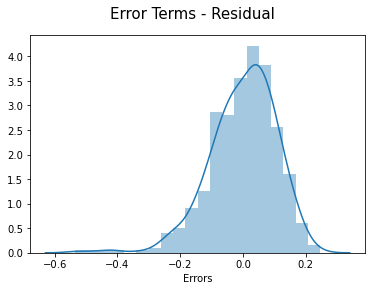

In [328]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms - Residual', fontsize = 15) 
plt.xlabel('Errors', fontsize = 10)
plt.show()

The residuals are normally distributed with a mean 0.

### Prediction using above final model

In [329]:
bikesharing_test.shape

(219, 32)

In [330]:
# Applying scaler() to all the columns except the 'dummy' and '0-1' variables for the test data
# here only transform operation has to be used on the test data.
num_vars = ['temp', 'atemp', 'hum','windspeed','casual','registered','cnt']
bikesharing_test[num_vars] = scaler.transform(bikesharing_test[num_vars])

In [331]:
bikesharing_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630,0.547400,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143,0.569029,...,0,0,0,0,1,0,0,0,0,0


In [332]:
bikesharing_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.266372,0.527146,0.520592,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.217246,0.217921,0.218435,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.002133,0.059486,0.048205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.101951,0.359154,0.377531,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.223712,0.526567,0.524275,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.362085,0.664742,0.672745,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.038708,0.985273,0.963300,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [333]:
# segregating the X and y terms
y_test = bikesharing_test.pop('cnt')
X_test = bikesharing_test

In [340]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [341]:
# dropping variables from X_test_m that are not needed for the analysis
X_test_m = X_test_m.drop(['holiday','Jul','hum','Tue','Jun','Dec','Feb','Oct','workingday','May','Mon',
                  'atemp','Aug','Nov','winter','Thu','Sat','Sun','Light Rain','temp','Sep','Jan','Mar',
                  'Wed','registered'], 1,)

In [342]:
# Making predictions using the fourth model
y_pred_m = lr_2.predict(X_test_m)

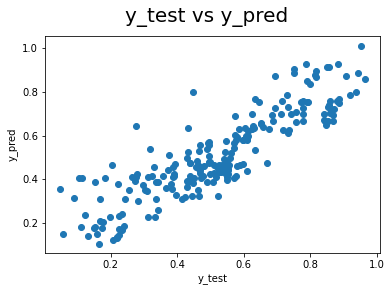

In [343]:
# evaluting the model
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 10)
plt.ylabel('y_pred', fontsize = 10)
plt.show()

#### The equation of our best fitted line is:

$ cnt = 0.2177  \times  yr - 0.1675  \times  windspeed + 0.3871 \times casual - 0.0529 \times Misty - 0.1873 \times spring $